<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-learning-labs/blob/julianblueml/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 1: Introduction


#Session 2: 05.06 - 13:00 - 14:30 :




## Intro:

Tensorflow is a powerful framework for implementing and deploying large-scale deep learning models. Recently, it has been widely used in both reasearch and production. TF objective is to combine scale and flexibility.

In the past session, we will learning the following:

1. TF programming stack
2. TF programming concepts including computatoin graphs, operations and sessions. 
3. Implementation of linear regression
4. Implementation of feed-forward neural networks

## TF stack:

TensorFlow is a framework composed of two core building blocks — a library for defining computational graphs and a runtime for executing such graphs on a variety of different hardware


![alt text](https://www.tensorflow.org/images/layers.png)


Before goining into details about the stack, let us talk about computational graphs.

### Computational Graphs

A directed graph is a data structure consisting of nodes (vertices) and edges. It’s a set of vertices connected pairwise by directed edges.

Graphs come in many shapes and sizes and are used to solve many real-life problems, such as representing networks including telephone networks, circuit networks, road networks, and even social networks. 
![alt text](https://cdn-images-1.medium.com/max/800/1*V6aYjD3AxDbEKYahkGqVQw.png)

TensorFlow uses directed graphs internally to represent computations, and they call this data flow graphs (or computational graphs).

The nodes in TF data flow graph mostly represents operations, variables and placeholders.

Take for example the following operation:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)

To create a computational graph out of this program, we create nodes for each of the operations in our program, along with the input variables a and b. In fact, a and b could be constants if they don’t change. If one node is used as the input to another operation we draw a directed arrow that goes from one node to another.

The computational graph for this program might look like this:
![alt text](https://cdn-images-1.medium.com/max/800/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

Operations create or manipulate data according to specific rules. In TensorFlow those rules are called Ops, short for operations. Variables on the other hand represent shared, persistent state that can be manipulated by running Ops on those variables.

The questions now what are the advantages of representing operations as directed graphs: The main advantage of using directed graphs is the ability to do **parallelism** and what is called **dependency driving scheduling**. 
For example, consider again the follwoing code:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)
At the most fundamental level, most computer programs are mainly composed of two things — primitive operations and an order in which these operations are executed, often sequentially, line by line. This means we would first multiply a and b and only when this expression was evaluated we would take their sum. Computational graphs on the otherhand, exclusively specify the dependencies across the operations.
If we look at our computational graph we see that we could execute the multiplication and addition in parallel. That’s because these two operations do not depend on each other.
 So we can use the topology of the graph to drive the scheduling of operations and execute them in the most efficient manner, e.g. using multiple GPUs on a single machine or even distribute the execution across multiple machines.
 Another key advantage is portability. The graph is a language-independent representation of our code. So we can build the graph in Python, save the model (TensorFlow uses protocol buffers), and restore the model in a different language, say C++, if you want to go really fast.
 
 

--------------------------------
# References:

https://medium.com/@d3lm/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

https://www.tensorflow.org/guide/extend/architecture

https://www.tensorflow.org/guide/low_level_intro

  
 






placeholder: tensor which are fed externally for example input or output tensors
variables: tesnors reprent the paramers of he nework graph


In [0]:
import tensorflow as tf
import numpy as np

##Single layer

In [0]:
#parameters
learning_rate=0.001
training_iters=200
batch_size=128

#network parameters
num_inputs=3
num_outputs=4
num_samples=100

X_gr=np.random.rand(num_samples,num_inputs)
Y_gr=np.random.rand(num_samples,num_outputs)

#tf Graph inputs
x=tf.placeholder(tf.float32,[None,num_inputs])
y=tf.placeholder(tf.float32,[None,num_outputs])

#initialize weights
w_1=tf.Variable(tf.random_normal([num_inputs,num_outputs]))

#model
y_p=tf.matmul(x,w_1)

#cost
cost=tf.reduce_mean(tf.pow(y-y_p,2))  #if costfunction is the mean square error

#optimisation
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#initializing the graph and the weights
init=tf.global_variables_initializer()

#Launch the graph
with tf.Session() as sess:
  sess.run(init)
  
  for i in range(1000):
  
    sess.run(optimizer,feed_dict={x: X_gr, y: Y_gr})
  
    pr_cost=sess.run(cost,feed_dict={x: X_gr, y: Y_gr})
    
    #print('Cost at iteration ', i,' is: ',pr_cost)
    
  Y_p_p=sess.run(y_p,feed_dict={x: X_gr, y: Y_gr})
  print('prediction error ',abs(Y_p_p-Y_gr))

prediction error  [[0.08706527 0.22227918 0.17307317 0.19587612]
 [0.12217768 0.18747675 0.60542193 0.24655775]
 [0.14058649 0.45091844 0.53207831 0.18104354]
 [0.60738767 0.08639518 0.67046181 0.39350741]
 [0.14778367 0.11503242 0.77534875 0.00635521]
 [0.4218795  0.28150145 0.51169949 0.2378768 ]
 [0.59550938 0.45371448 0.18600067 0.18324254]
 [0.42432377 0.46432578 0.48384857 0.1514943 ]
 [0.68346406 0.03095527 0.3730602  0.46588948]
 [0.40262748 0.54960878 0.18120493 0.03612313]
 [0.02592609 0.41085821 0.22666276 0.14193958]
 [0.17456174 0.60122972 0.31976542 0.15972869]
 [0.16499099 0.01522087 0.04675715 0.10796038]
 [0.29754681 0.06518524 0.52469327 0.17030137]
 [0.1614586  0.35499395 0.23685987 0.25727932]
 [0.29147277 0.0526848  0.43923788 0.08598555]
 [0.04141618 0.10903251 0.6205448  0.61960314]
 [0.45893584 0.26957936 0.31481146 0.47480421]
 [0.27730631 0.04060277 0.33445269 0.19679049]
 [1.19051922 0.36803791 0.07834721 0.35558221]
 [0.53427137 0.66679453 0.58384919 0.05604

## Two hidden, one output layer

In [0]:
#parameters
learning_rate=0.001
training_iters=200
batch_size=128

#network parameters
num_inputs=3
num_h1_n=4
num_h2_n=10
num_outputs=4
num_samples=10

X_gr=np.random.rand(num_samples,num_inputs)
Y_gr=np.random.rand(num_samples,num_outputs)

#tf Graph inputs
x=tf.placeholder(tf.float32,[None,num_inputs])
y=tf.placeholder(tf.float32,[None,num_outputs])

#initialize weights
w_1=tf.Variable(tf.random_normal([num_inputs,num_h1_n]))
w_2=tf.Variable(tf.random_normal([num_h1_n,num_h2_n]))
w_3=tf.Variable(tf.random_normal([num_h2_n,num_outputs]))

#bias
b_1=tf.Variable(tf.random_normal([num_h1_n]))
b_2=tf.Variable(tf.random_normal([num_h2_n]))
b_3=tf.Variable(tf.random_normal([num_outputs]))


#model
h1=tf.nn.sigmoid(tf.add(tf.matmul(x,w_1),b_1))  #hidden layer 1
h2=tf.nn.sigmoid(tf.add(tf.matmul(h1,w_2),b_2)) #hidden layer 2
y_p=tf.add(tf.matmul(h2,w_3),b_3)               #output layer

#cost
cost=tf.reduce_mean(tf.pow(y-y_p,2))  #if costfunction is the mean square error

#optimisation
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#initializing the graph and the weights
init=tf.global_variables_initializer()

#Launch the graph
with tf.Session() as sess:
  sess.run(init)
  
  for i in range(1000):
  
    sess.run(optimizer,feed_dict={x: X_gr, y: Y_gr})
  
    pr_cost=sess.run(cost,feed_dict={x: X_gr, y: Y_gr})
    
    #print('Cost at iteration ', i,' is: ',pr_cost)
    
  Y_p_p=sess.run(y_p,feed_dict={x: X_gr, y: Y_gr})
  display('prediction error ',abs(Y_p_p-Y_gr))

'prediction error '

array([[0.28878736, 0.46373458, 0.10647477, 0.34256426],
       [0.1654178 , 0.38149652, 0.09211982, 0.15299316],
       [0.31100102, 0.36832802, 0.22965313, 0.5303063 ],
       [0.41287048, 0.47661053, 0.17304211, 0.29213752],
       [0.04144417, 0.13319063, 0.29790729, 0.21917549],
       [0.41661042, 0.22859673, 0.43643954, 0.14736618],
       [0.16129263, 0.42448818, 0.14582871, 0.0713651 ],
       [0.48681007, 0.48988344, 0.12773934, 0.08961366],
       [0.2827795 , 0.03619691, 0.40172079, 0.25901881],
       [0.20438436, 0.28999509, 0.17567854, 0.20871449]])

##Hand writing(numbers) detection

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /temp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /temp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /temp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /temp/data/t10k-labels-idx1-ubyte.gz
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


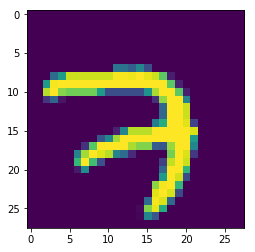

In [36]:
%matplotlib inline
from matplotlib.pyplot import imshow

#Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/temp/data/", one_hot=True)

mnist.train.images.shape
#MNIST data input (img shape 28x28)

image = mnist.train.images[0].reshape((28,28))
imshow(image)

print(mnist.train.labels[0])

#network has to have 9 outputs 0-9 

In [0]:
#Training data
X_train=mnist.train.images
Y_train=mnist.train.labels

#Testing data
X_test=mnist.test.images
Y_test=mnist.test.images

#Validation data
X_valid=mnist.validation.images
Y_valid=mnist.validation.images

#Parameters
learning_rate=0.001
training_iters=2000
batch_size=128

num_inputs=784
num_h1_n=100
num_h2_n=100
num_outputs=10

#tf Graph inputs
x=tf.placeholder(tf.float32,[None,num_inputs])
y=tf.placeholder(tf.float32,[None,num_outputs])

#initialize weights
w_1=tf.Variable(tf.random_normal([num_inputs,num_h1_n]))
w_2=tf.Variable(tf.random_normal([num_h1_n,num_h2_n]))
w_3=tf.Variable(tf.random_normal([num_h2_n,num_outputs]))

#bias
b_1=tf.Variable(tf.random_normal([num_h1_n]))
b_2=tf.Variable(tf.random_normal([num_h2_n]))
b_3=tf.Variable(tf.random_normal([num_outputs]))


#model
h1=tf.nn.sigmoid(tf.add(tf.matmul(x,w_1),b_1))  #hidden layer 1
h2=tf.nn.sigmoid(tf.add(tf.matmul(h1,w_2),b_2)) #hidden layer 2
y_p=tf.add(tf.matmul(h2,w_3),b_3)               #output layer

#cost
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p,labels=y))  #comparing two different distributions

#Evaluate model
#2 images, y_p=[[0.1,0.3,0.2,0.9],[0.8,0.1,0.2,0,1]]
#tf.argmax(y_p,1) -> [4,1]
#            y=[[0,0,0,1],[0,0,1,0]]
#tf.argmax(y,1) -> [4,3]
#tf.equal() -> [True, False]
#tf.reuce_mean() -> 0.5
correct_pred=tf.equal(tf.argmax(y_p,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#optimisation
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#initializing the graph and the weights
init=tf.global_variables_initializer()

#Launch the graph
with tf.Session() as sess:
  sess.run(init)
  
  for i in range(1000):
    batch_x, batch_y=mnist.train.next_batch(batch_size)
    
    sess.run(optimizer,feed_dict={x: batch_x, y: batch_y})
  
    train_cost,train_accuracy=sess.run([cost,accuracy],feed_dict={x: batch_x, y: batch_y})
    
    test_batch_x,test_batch_y=mnist.test.next_batch(batch_size)
    
    test_cost,test_accuracy=sess.run([cost,accuracy],feed_dict={x: batch_x, y: batch_y})
    
    print('Train_cost',train_cost,' Train_accuracy',train_accuracy,'Test_cost',test_cost,' Test_accuracy',test_accuracy)

Train_cost 11.150161  Train_accuracy 0.125 Test_cost 11.150161  Test_accuracy 0.125
Train_cost 12.1324835  Train_accuracy 0.0625 Test_cost 12.1324835  Test_accuracy 0.0625
Train_cost 10.687178  Train_accuracy 0.109375 Test_cost 10.687178  Test_accuracy 0.109375
Train_cost 11.660044  Train_accuracy 0.0859375 Test_cost 11.660044  Test_accuracy 0.0859375
Train_cost 9.675132  Train_accuracy 0.125 Test_cost 9.675132  Test_accuracy 0.125
Train_cost 9.549274  Train_accuracy 0.1015625 Test_cost 9.549274  Test_accuracy 0.1015625
Train_cost 9.7617445  Train_accuracy 0.1015625 Test_cost 9.7617445  Test_accuracy 0.1015625
Train_cost 9.423995  Train_accuracy 0.09375 Test_cost 9.423995  Test_accuracy 0.09375
Train_cost 9.311283  Train_accuracy 0.09375 Test_cost 9.311283  Test_accuracy 0.09375
Train_cost 8.116012  Train_accuracy 0.09375 Test_cost 8.116012  Test_accuracy 0.09375
Train_cost 8.505035  Train_accuracy 0.1328125 Test_cost 8.505035  Test_accuracy 0.1328125
Train_cost 7.5476704  Train_accura

##CNN

In [48]:
n_classes=10
learning_rate=0.002
batch_size=64

import tensorflow as tf

import matplotlib.pyplot as plt
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x


num_inputs = 784
num_outputs= 10

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs],name = 'input')
y = tf.placeholder(tf.float32, [None, num_outputs],name =  'output')


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    
    with tf.name_scope('input-reshape'):
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

    with tf.name_scope('conv-1'):

        # Convolution Layer
        conv_pre_actv_1 = conv2d(x, weights['wc1'], biases['bc1'])
        conv_actv_1 = tf.nn.relu(conv_pre_actv_1)
        
        print('conv_actv_1 max',conv_actv_1.get_shape().as_list())

    with tf.name_scope('maxpooling-1'):
        
        # Max Pooling (down-sampling)
        conv1 = maxpool2d(conv_actv_1, k=2)
        print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    with tf.name_scope('conv-2'):

        conv_pre_actv_2 = conv2d(conv1, weights['wc2'], biases['bc2'])
        conv_actv_2 = tf.nn.relu(conv_pre_actv_2)

        
        print('con2_before max',conv_actv_2.get_shape().as_list())


    with tf.name_scope('maxpooling-2'):
        
     
        # Max Pooling (down-sampling)
        conv2 = maxpool2d(conv_actv_2, k=2)
        print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    with tf.name_scope('flatten'):
    
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    with tf.name_scope('output'):
    
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
        
    list_of_tensors = [conv_pre_actv_1,conv_actv_1, conv1,conv_pre_actv_2,conv_actv_2, conv2, fc1]
    return out, list_of_tensors


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

y_p,list_of_tensors = conv_net(x, weights, biases)

#crossentropy cost
with tf.name_scope('cross_entropy'):

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost

cost_merg=tf.summary.scalar('cross_entropy', cost)


# Evaluate model
with tf.name_scope('operations'):

    correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#
merged = tf.summary.scalar('accuracy', accuracy)



# optimisation 
with tf.name_scope('optimisation'):

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
#merged = tf.summary.merge_all()

init = tf.global_variables_initializer()



# Launch the graph
with tf.Session() as sess:
    #graph_writer = tf.summary.FileWriter('./log/train', sess.graph)
    #graph_writer.add_summary()
    train_writer = tf.summary.FileWriter('./log/train', sess.graph)
    test_writer = tf.summary.FileWriter('./log/test')
    sess.run(init)
    print('started')
    
    for i in range(10000):
        
        
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        

        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})


        summary,train_cost , train_acc = sess.run([merged,cost,accuracy], feed_dict={x: batch_x,y: batch_y})
        train_writer.add_summary(summary, i)

        #print('started')

        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        summary,test_cost, test_acc  = sess.run([merged,cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        train_writer.add_summary(summary, i)
        
        if i % 100 ==0:
            
           
            val_list_of_tensors = sess.run(list_of_tensors, feed_dict={x: test_batch_x})
            num_of_returned_sensors = len(val_list_of_tensors)
            
            print(val_list_of_tensors[-1].shape)
            
            imshow(val_list_of_tensors[0][0,:,:,0], cmap='gray')# conv1 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[1][0,:,:,0],  cmap='gray')# conv1 after-activation first input image first filter
            plt.show()

            
            imshow(val_list_of_tensors[2][0,:,:,0], cmap='gray')# conv2 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[3][0,:,:,0], cmap='gray')# conv2 after-activation first input image first filter
            plt.show()
            
            imshow(val_list_of_tensors[-1], cmap='gray')# conv2 pre-activation first input image first filter
            plt.show()


            print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc, 'num_of_returned_sensors:', num_of_returned_sensors )


    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)

conv_actv_1 max [None, 28, 28, 32]
con1_after max [None, 14, 14, 32]
con2_before max [None, 14, 14, 64]
con2_after max [None, 7, 7, 64]
started


AttributeError: ignored

##Tensorboard

conv_actv_1 max [None, 28, 28, 32]
con1_after max [None, 14, 14, 32]
con2_before max [None, 14, 14, 64]
con2_after max [None, 7, 7, 64]
started
(64, 1024)


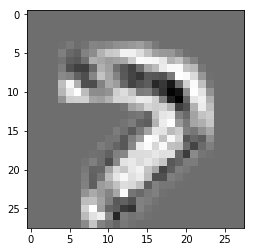

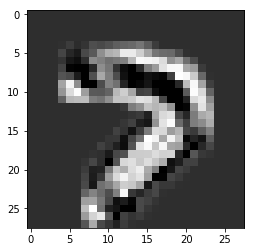

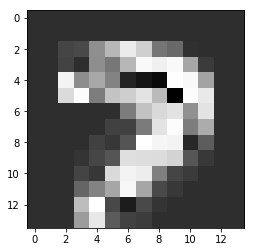

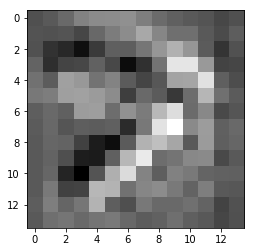

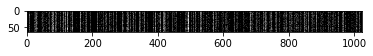

iter:  0 train_cost:  69416.06 train_acc:  0.09375 test_cost:  78227.72 test_acc:  0.09375 num_of_returned_sensors: 7
(64, 1024)


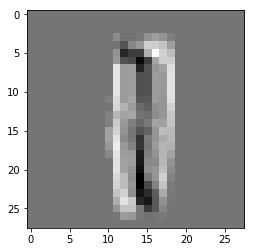

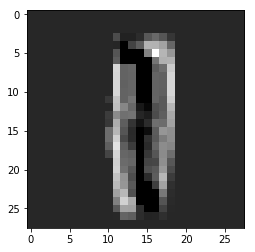

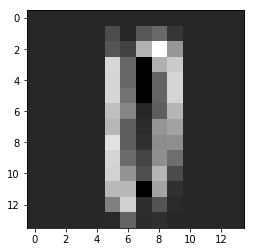

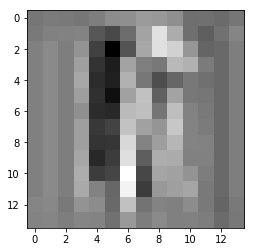

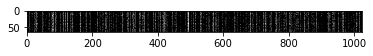

iter:  100 train_cost:  880.4271 train_acc:  0.9375 test_cost:  2831.3313 test_acc:  0.875 num_of_returned_sensors: 7
(64, 1024)


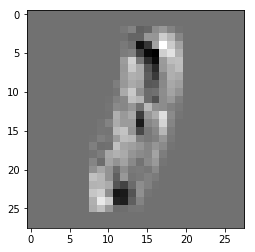

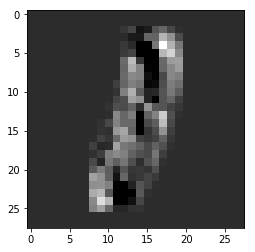

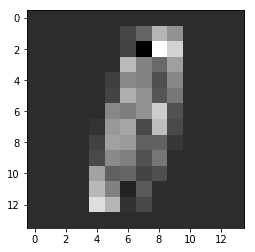

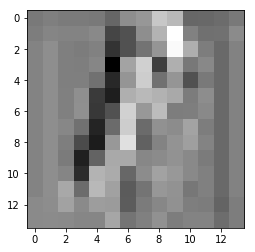

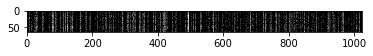

iter:  200 train_cost:  412.24777 train_acc:  0.90625 test_cost:  1306.4257 test_acc:  0.90625 num_of_returned_sensors: 7
(64, 1024)


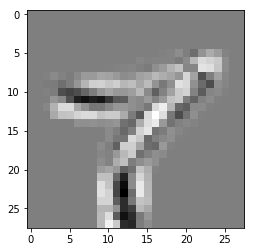

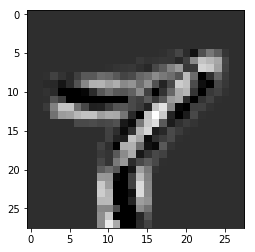

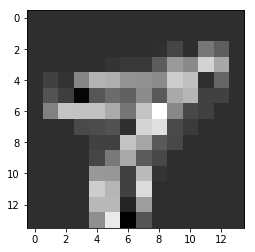

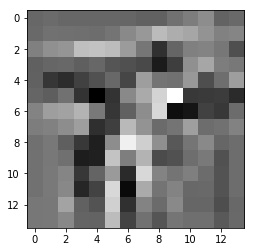

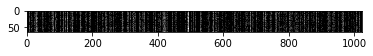

iter:  300 train_cost:  1065.3286 train_acc:  0.90625 test_cost:  390.32028 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


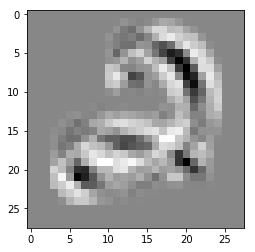

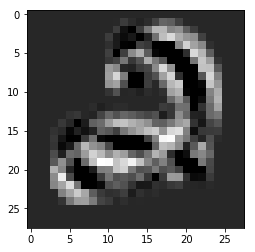

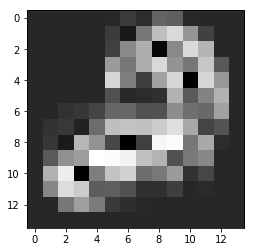

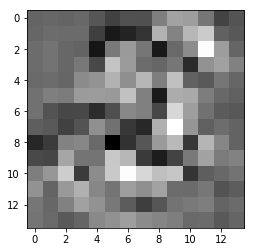

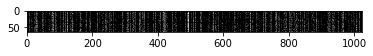

iter:  400 train_cost:  450.9988 train_acc:  0.96875 test_cost:  472.79028 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


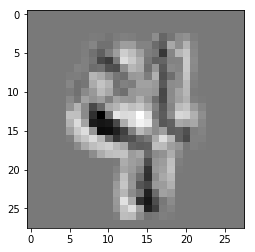

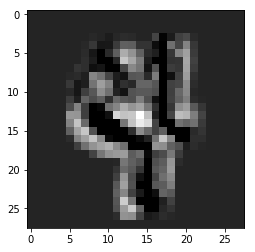

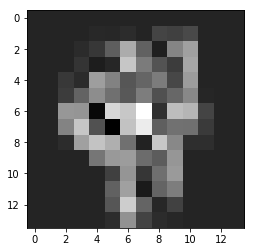

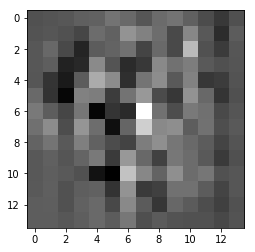

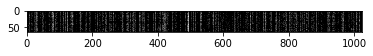

iter:  500 train_cost:  294.54977 train_acc:  0.96875 test_cost:  695.3174 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


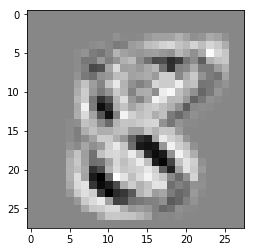

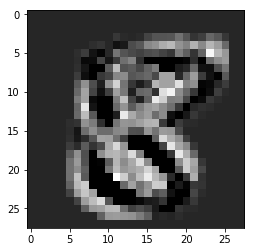

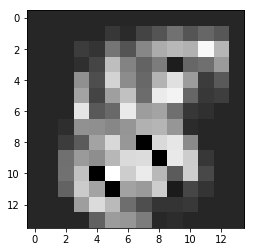

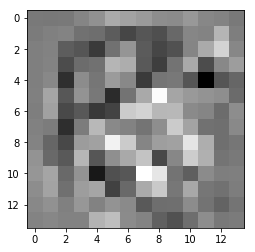

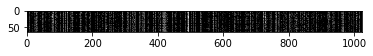

iter:  600 train_cost:  688.9453 train_acc:  0.953125 test_cost:  668.18884 test_acc:  0.921875 num_of_returned_sensors: 7
(64, 1024)


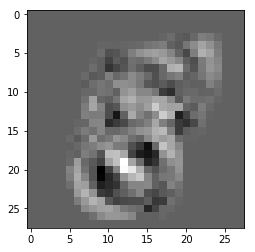

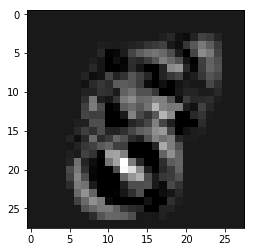

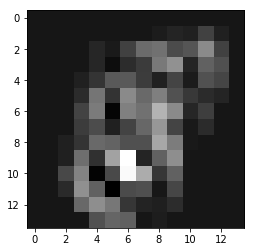

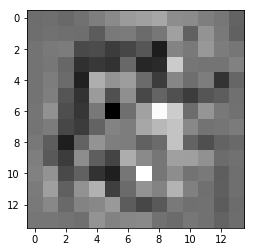

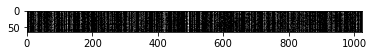

iter:  700 train_cost:  214.50797 train_acc:  0.96875 test_cost:  532.51843 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


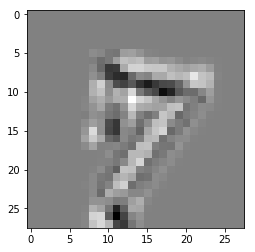

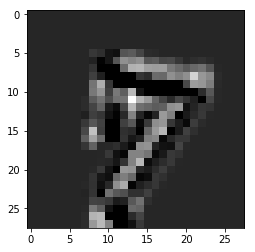

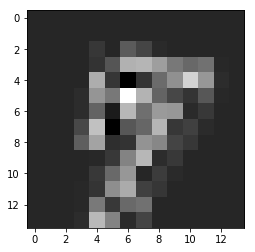

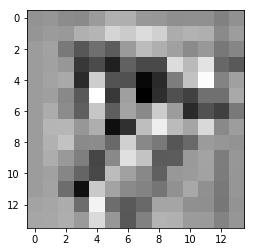

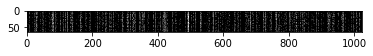

iter:  800 train_cost:  714.2549 train_acc:  0.984375 test_cost:  240.43063 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


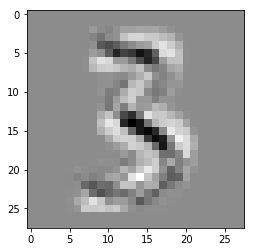

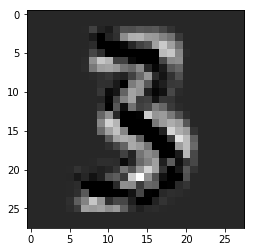

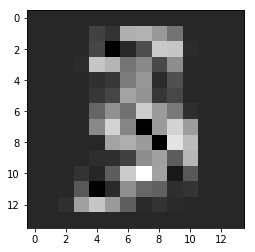

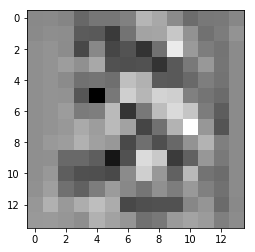

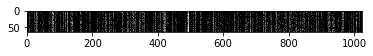

iter:  900 train_cost:  164.2592 train_acc:  0.953125 test_cost:  581.68164 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


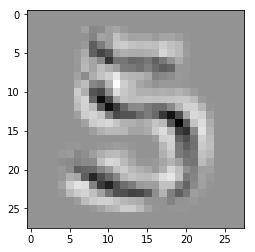

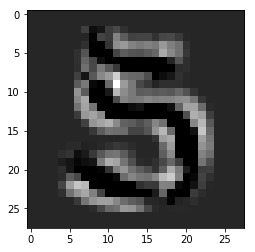

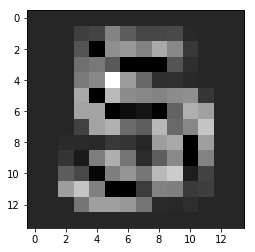

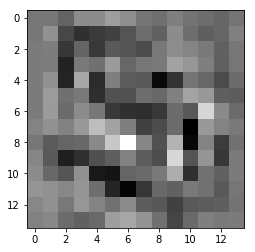

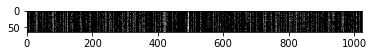

iter:  1000 train_cost:  46.717407 train_acc:  0.984375 test_cost:  461.15686 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


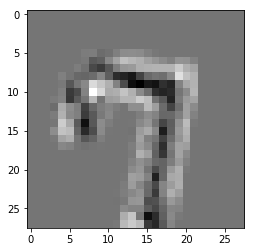

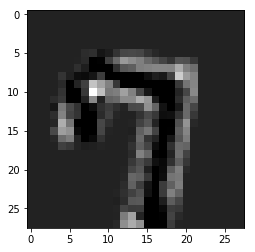

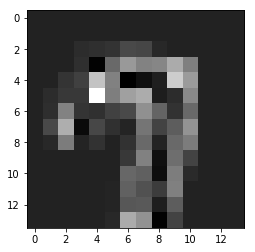

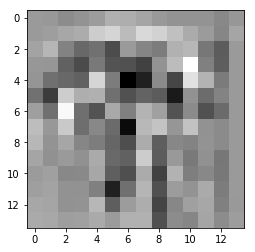

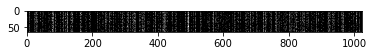

iter:  1100 train_cost:  45.448364 train_acc:  0.96875 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


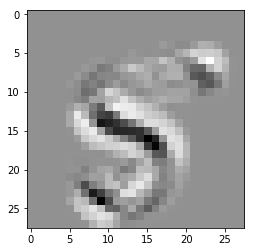

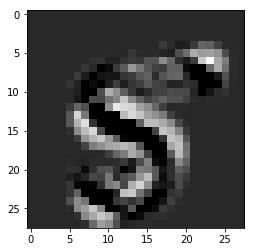

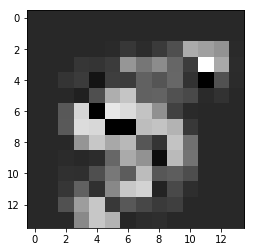

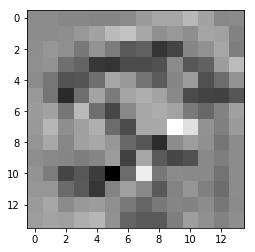

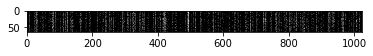

iter:  1200 train_cost:  303.4228 train_acc:  0.96875 test_cost:  347.87158 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


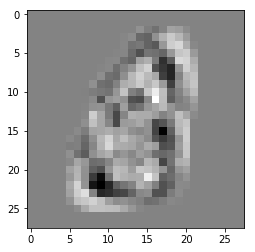

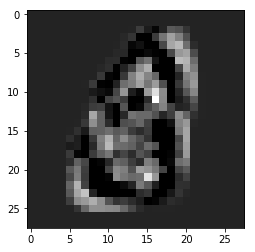

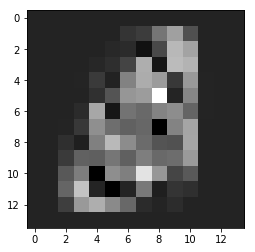

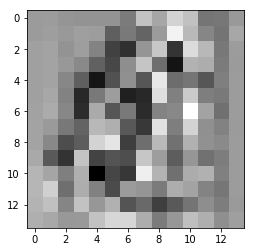

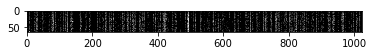

iter:  1300 train_cost:  48.43631 train_acc:  0.96875 test_cost:  197.82068 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


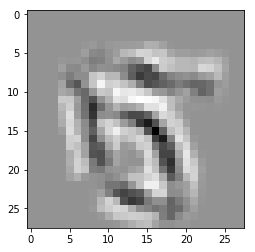

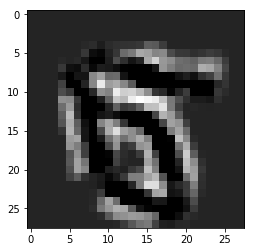

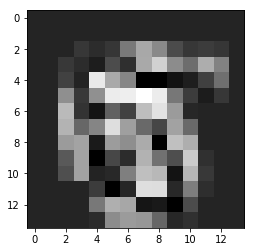

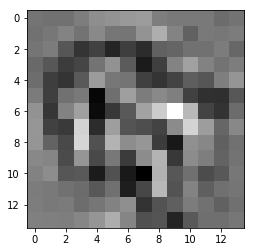

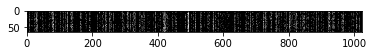

iter:  1400 train_cost:  62.0755 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


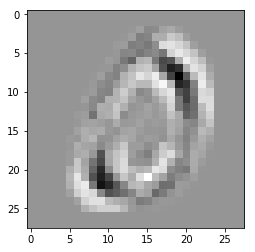

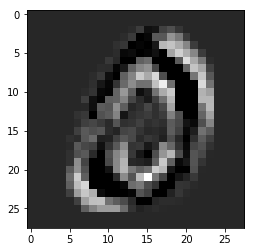

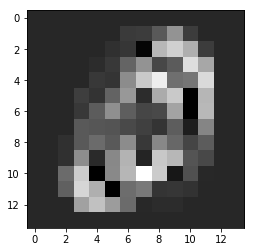

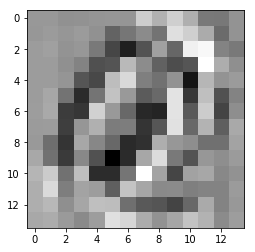

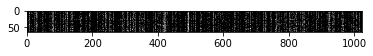

iter:  1500 train_cost:  0.0 train_acc:  1.0 test_cost:  719.7394 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


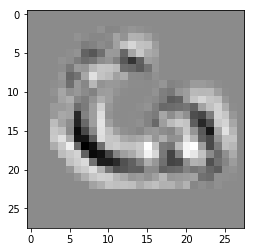

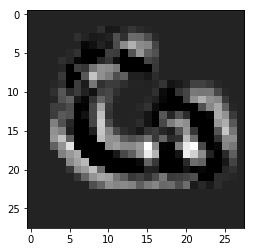

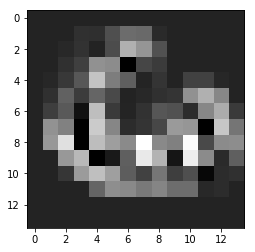

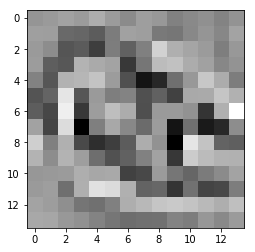

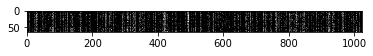

iter:  1600 train_cost:  126.87802 train_acc:  0.984375 test_cost:  164.676 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


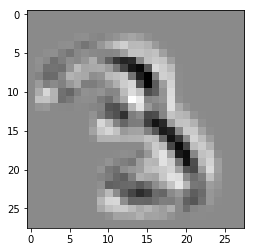

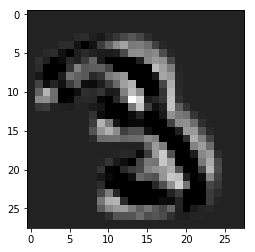

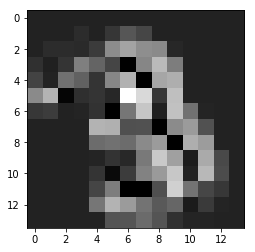

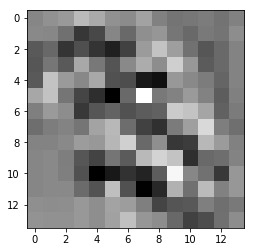

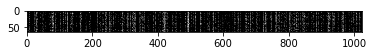

iter:  1700 train_cost:  63.46869 train_acc:  0.96875 test_cost:  361.56653 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


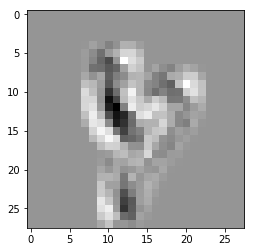

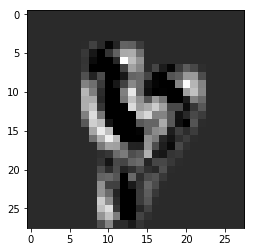

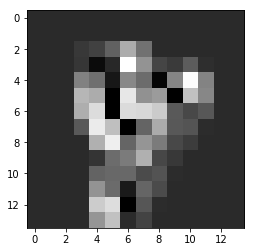

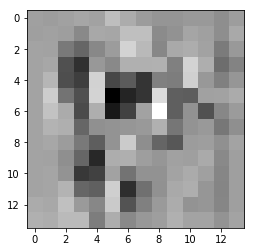

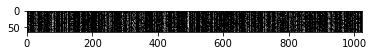

iter:  1800 train_cost:  18.444519 train_acc:  0.984375 test_cost:  2.3756866 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


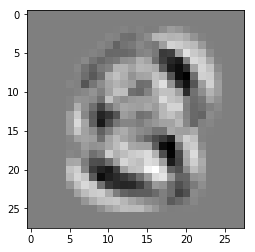

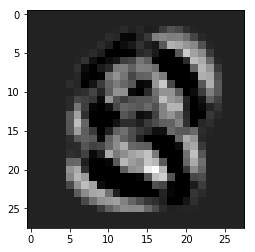

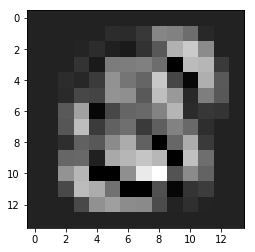

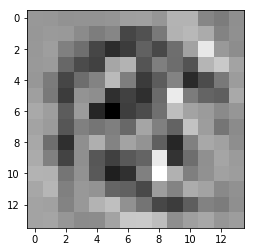

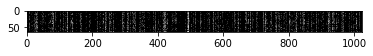

iter:  1900 train_cost:  34.050476 train_acc:  0.984375 test_cost:  233.1104 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


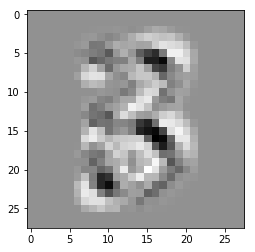

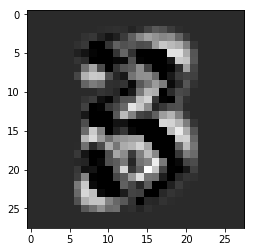

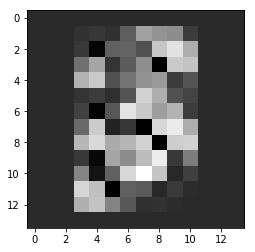

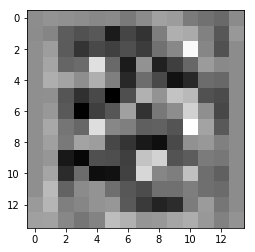

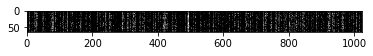

iter:  2000 train_cost:  0.0 train_acc:  1.0 test_cost:  166.62912 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


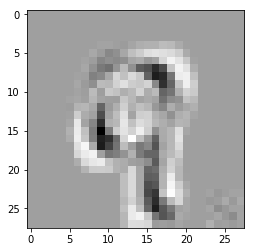

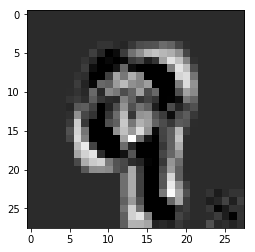

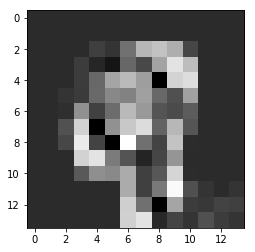

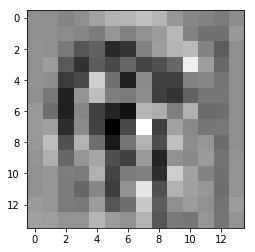

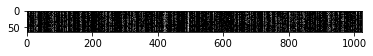

iter:  2100 train_cost:  0.0 train_acc:  1.0 test_cost:  5.8110504 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


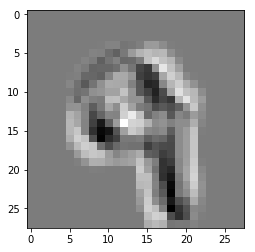

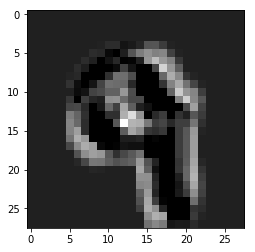

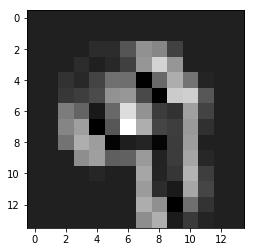

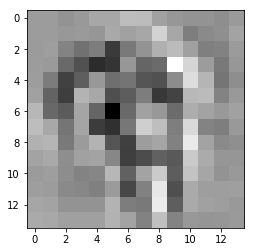

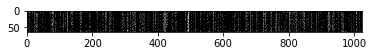

iter:  2200 train_cost:  7.83107 train_acc:  0.984375 test_cost:  15.352539 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


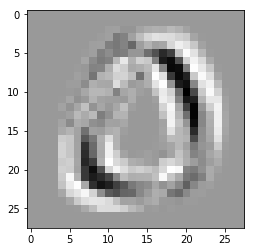

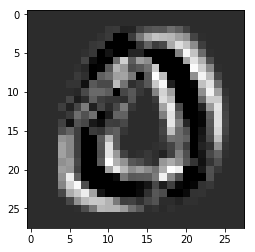

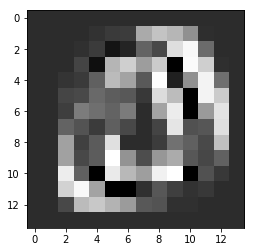

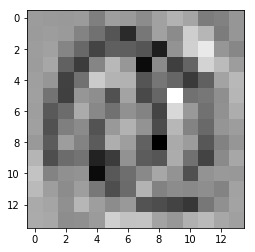

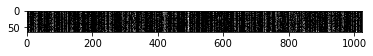

iter:  2300 train_cost:  123.292755 train_acc:  0.96875 test_cost:  42.7659 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


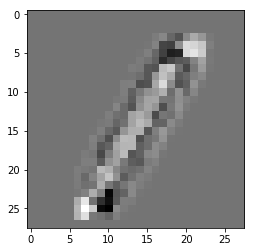

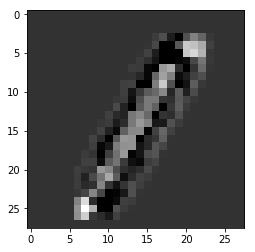

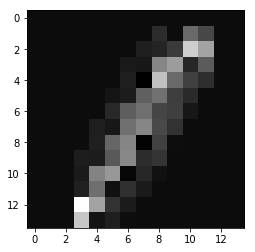

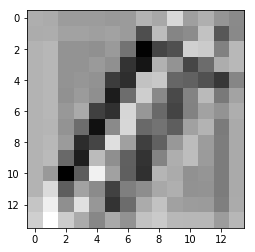

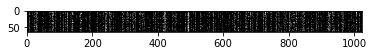

iter:  2400 train_cost:  277.05603 train_acc:  0.96875 test_cost:  147.59097 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


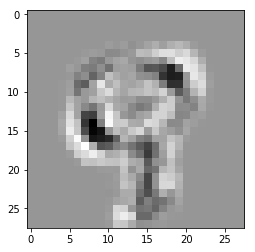

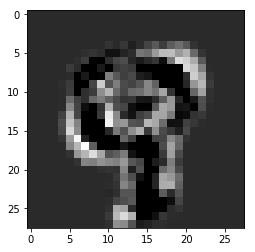

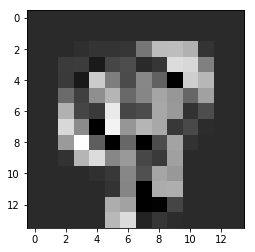

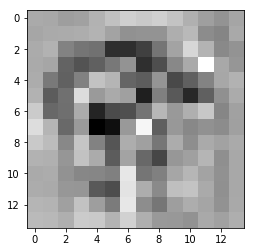

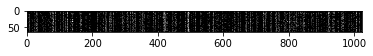

iter:  2500 train_cost:  26.510712 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


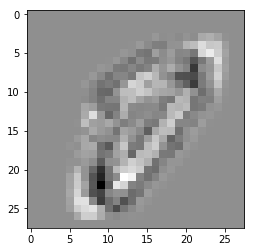

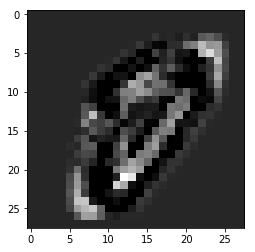

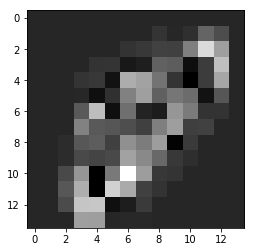

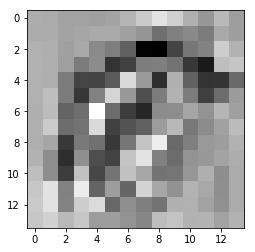

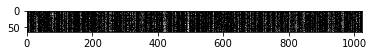

iter:  2600 train_cost:  0.0 train_acc:  1.0 test_cost:  52.38974 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


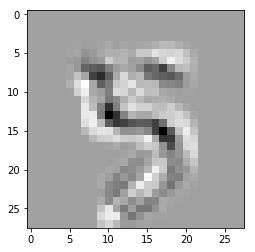

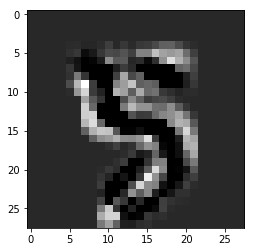

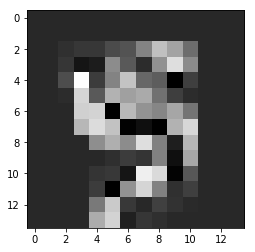

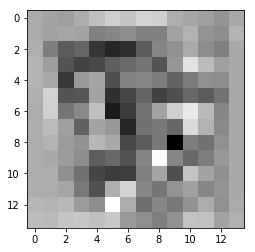

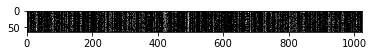

iter:  2700 train_cost:  0.13815534 train_acc:  0.984375 test_cost:  193.42719 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


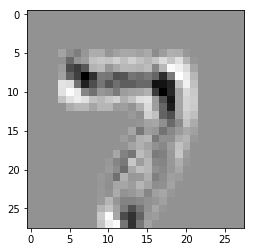

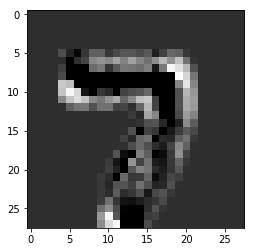

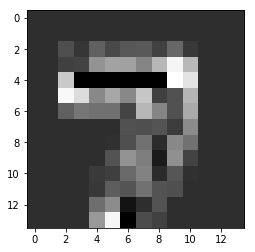

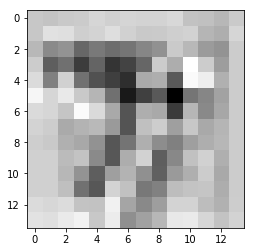

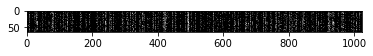

iter:  2800 train_cost:  0.0 train_acc:  1.0 test_cost:  95.98248 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


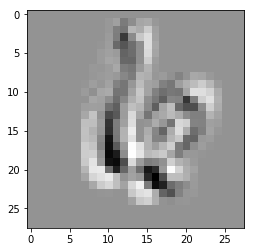

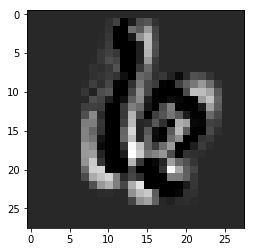

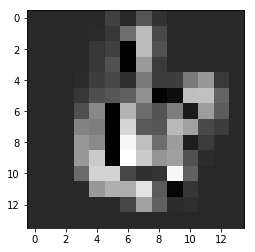

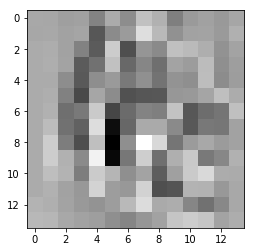

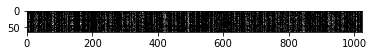

iter:  2900 train_cost:  48.197083 train_acc:  0.984375 test_cost:  236.3309 test_acc:  0.921875 num_of_returned_sensors: 7
(64, 1024)


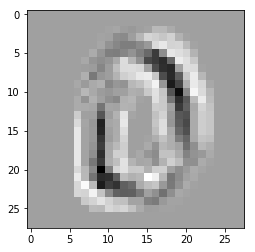

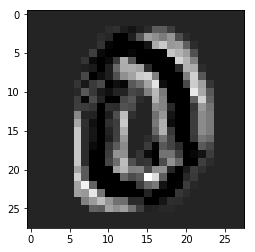

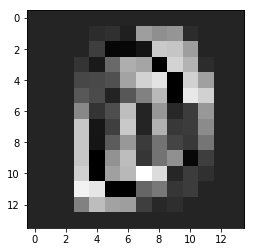

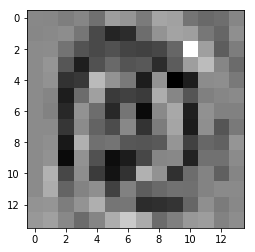

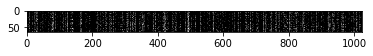

iter:  3000 train_cost:  0.0 train_acc:  1.0 test_cost:  146.91284 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


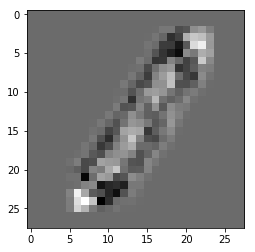

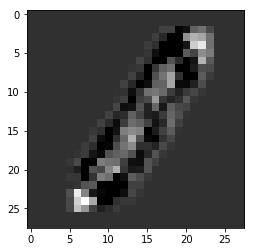

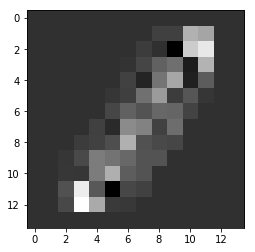

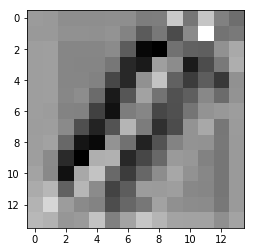

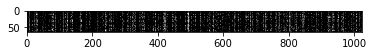

iter:  3100 train_cost:  0.0 train_acc:  1.0 test_cost:  53.813736 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


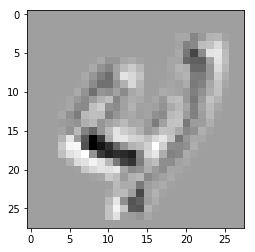

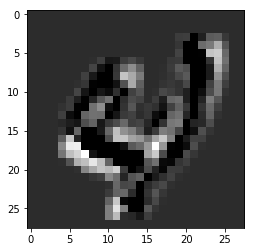

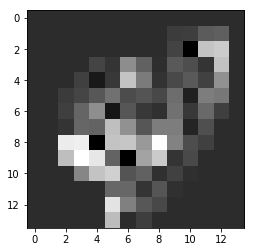

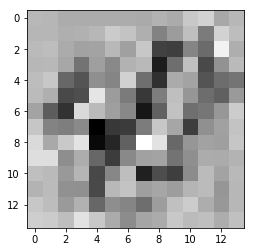

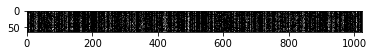

iter:  3200 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


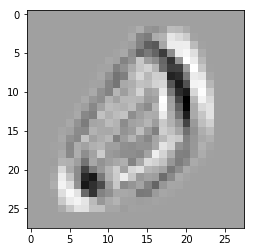

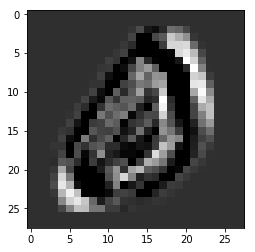

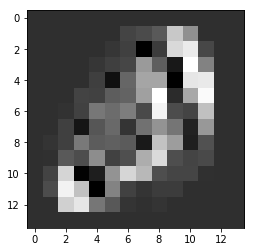

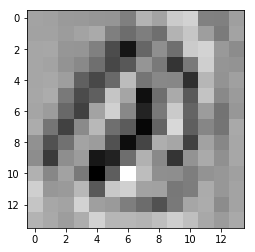

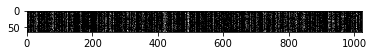

iter:  3300 train_cost:  0.0 train_acc:  1.0 test_cost:  29.115967 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


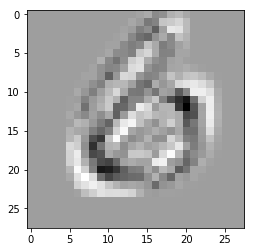

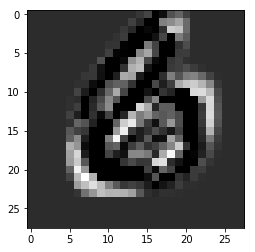

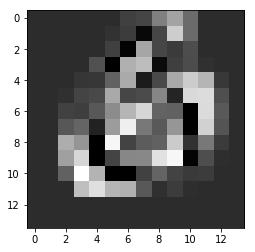

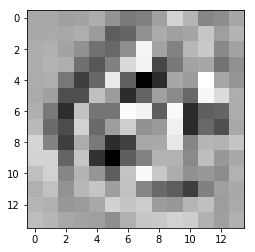

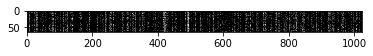

iter:  3400 train_cost:  0.0 train_acc:  1.0 test_cost:  134.82672 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


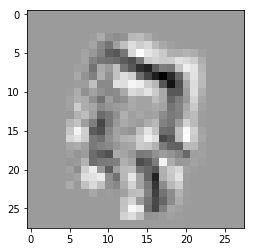

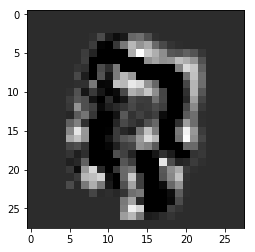

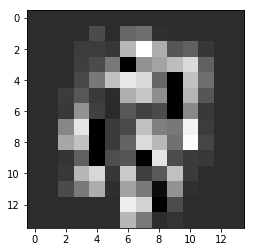

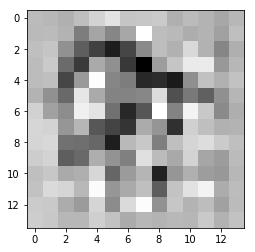

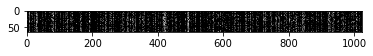

iter:  3500 train_cost:  0.0 train_acc:  1.0 test_cost:  93.42731 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


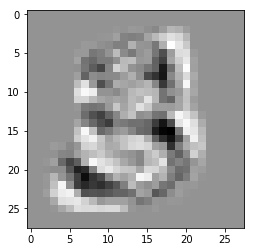

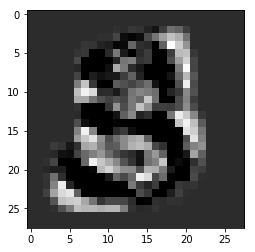

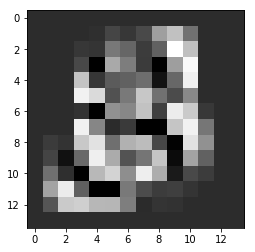

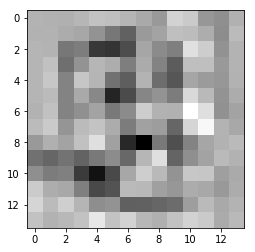

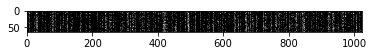

iter:  3600 train_cost:  0.0 train_acc:  1.0 test_cost:  849.0912 test_acc:  0.921875 num_of_returned_sensors: 7
(64, 1024)


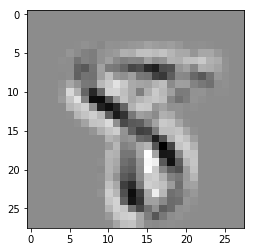

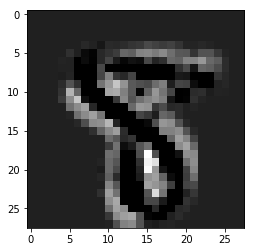

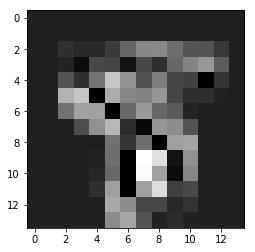

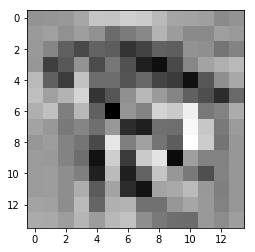

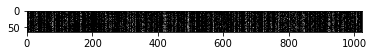

iter:  3700 train_cost:  4.2055664 train_acc:  0.984375 test_cost:  66.31233 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


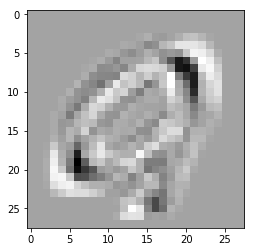

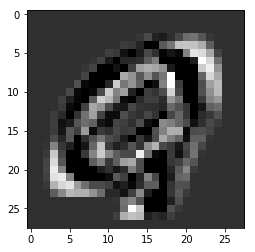

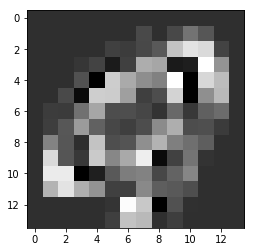

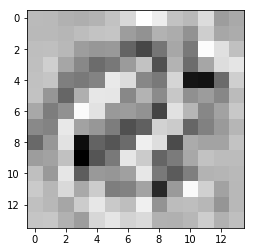

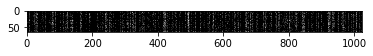

iter:  3800 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


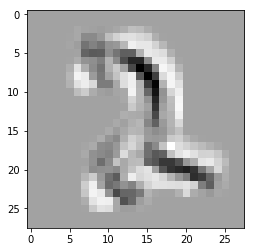

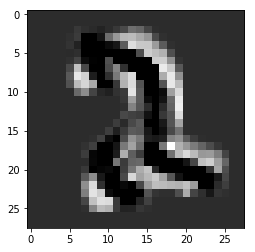

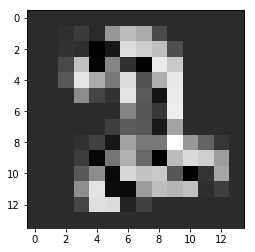

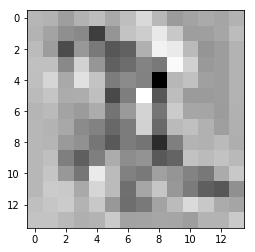

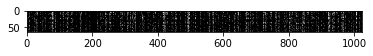

iter:  3900 train_cost:  0.0 train_acc:  1.0 test_cost:  126.13379 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


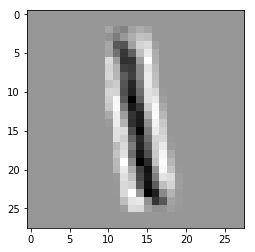

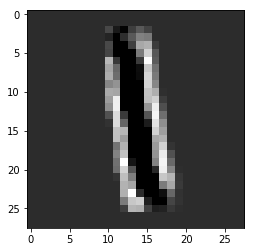

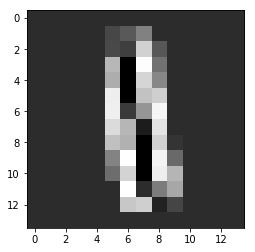

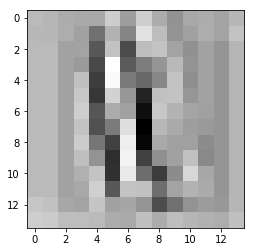

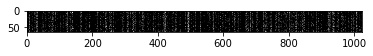

iter:  4000 train_cost:  0.0 train_acc:  1.0 test_cost:  41.289734 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


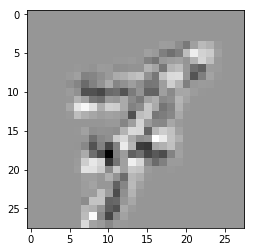

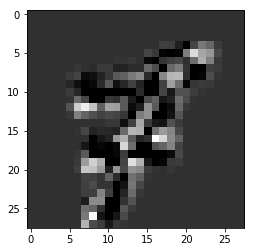

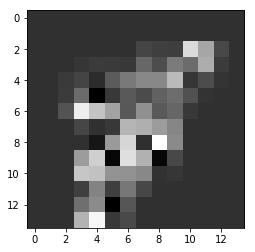

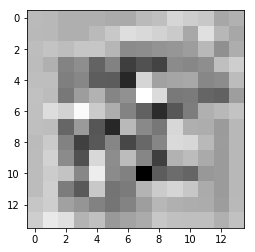

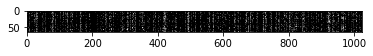

iter:  4100 train_cost:  0.0 train_acc:  1.0 test_cost:  134.01093 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


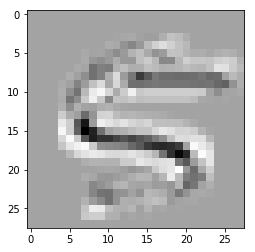

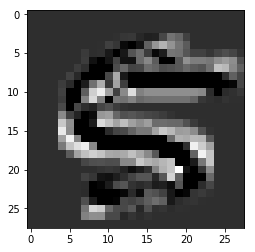

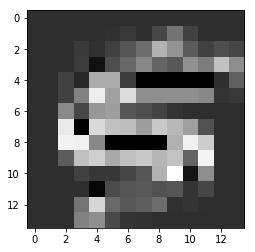

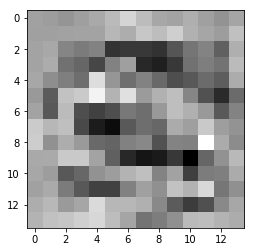

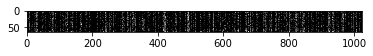

iter:  4200 train_cost:  0.0 train_acc:  1.0 test_cost:  46.30783 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


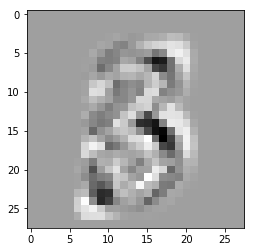

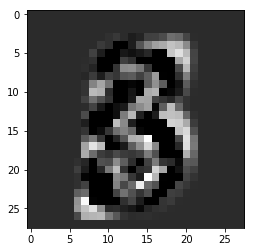

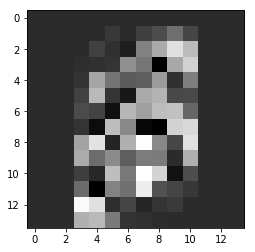

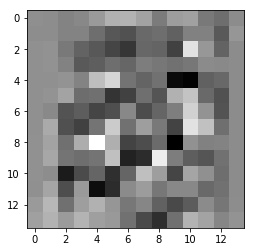

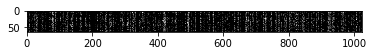

iter:  4300 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


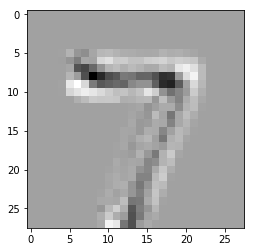

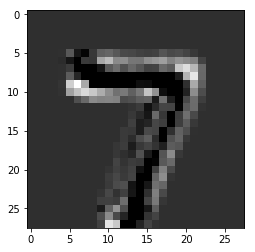

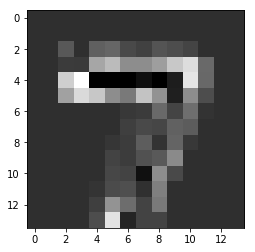

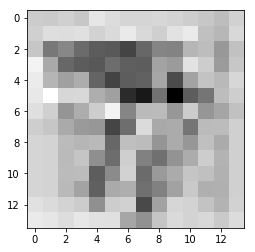

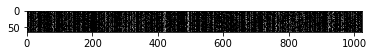

iter:  4400 train_cost:  63.999115 train_acc:  0.984375 test_cost:  326.08704 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


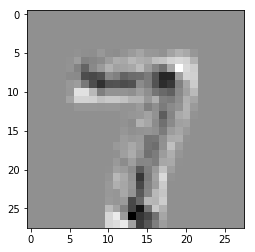

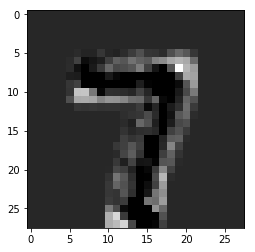

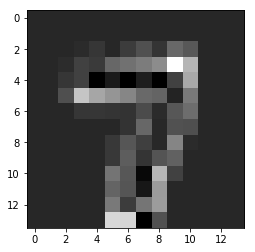

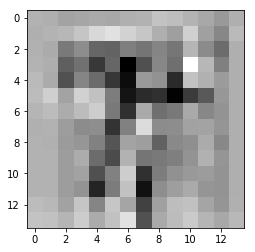

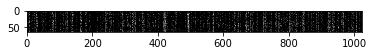

iter:  4500 train_cost:  0.0 train_acc:  1.0 test_cost:  195.01926 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


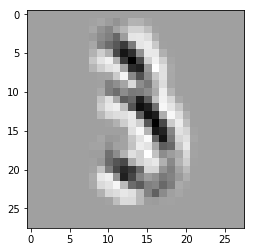

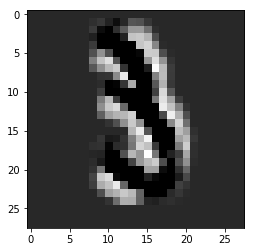

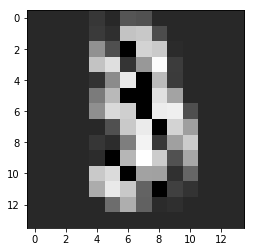

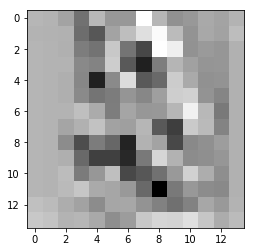

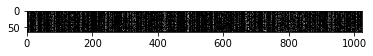

iter:  4600 train_cost:  0.0 train_acc:  1.0 test_cost:  94.27406 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


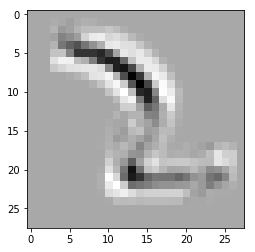

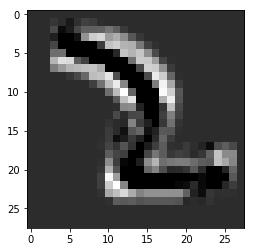

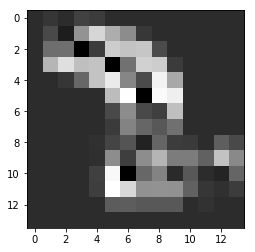

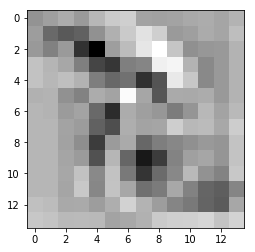

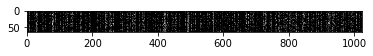

iter:  4700 train_cost:  54.332916 train_acc:  0.984375 test_cost:  36.72455 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


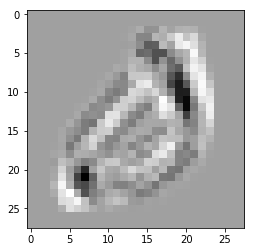

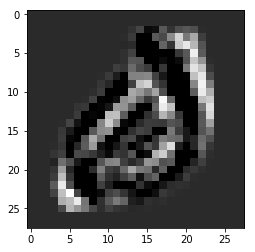

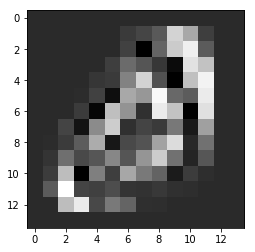

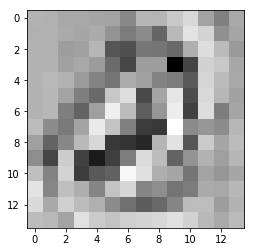

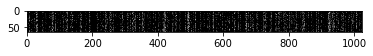

iter:  4800 train_cost:  45.19693 train_acc:  0.984375 test_cost:  118.5681 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


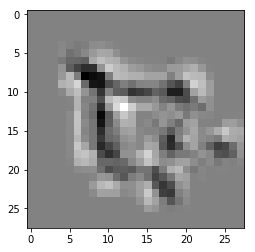

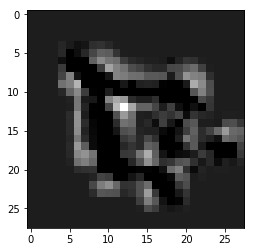

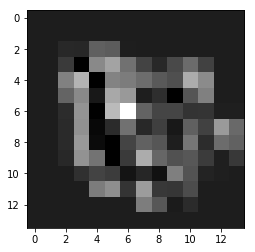

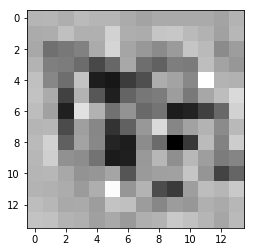

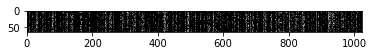

iter:  4900 train_cost:  0.0 train_acc:  1.0 test_cost:  12.865234 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


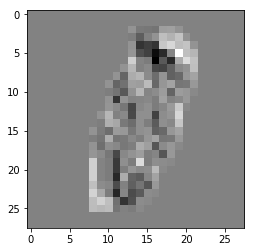

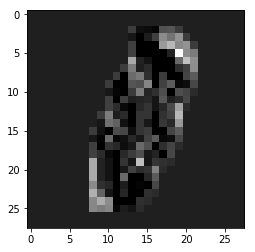

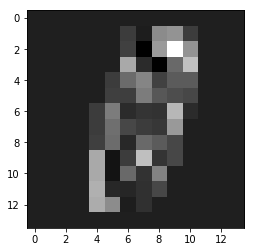

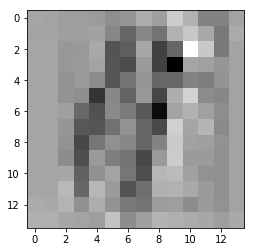

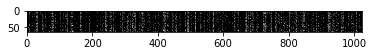

iter:  5000 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


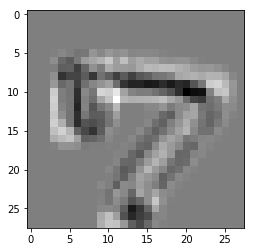

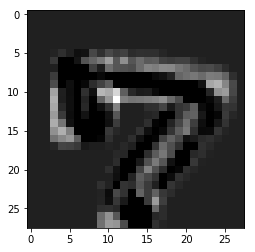

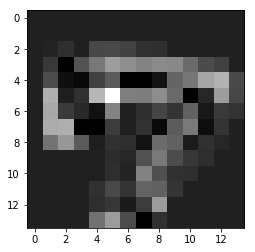

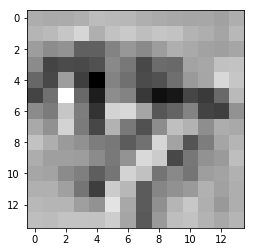

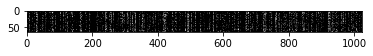

iter:  5100 train_cost:  0.0 train_acc:  1.0 test_cost:  29.748535 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


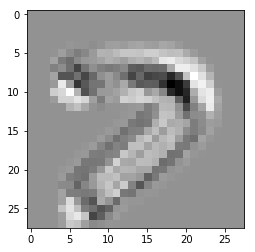

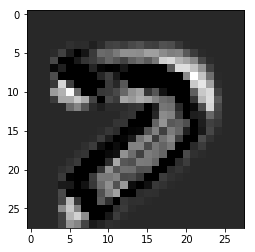

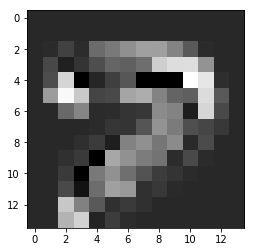

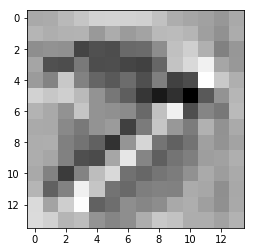

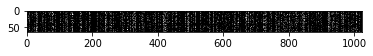

iter:  5200 train_cost:  0.0 train_acc:  1.0 test_cost:  116.81592 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


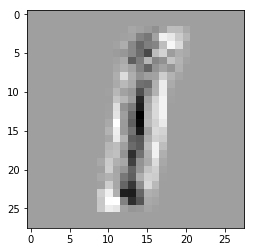

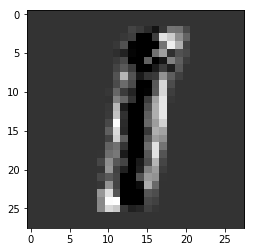

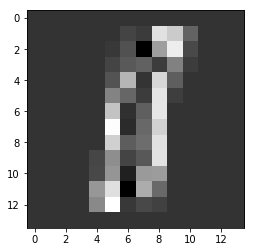

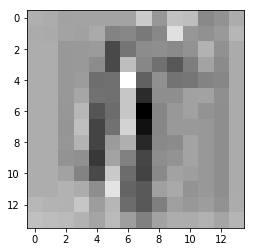

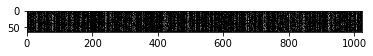

iter:  5300 train_cost:  0.0 train_acc:  1.0 test_cost:  30.748795 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


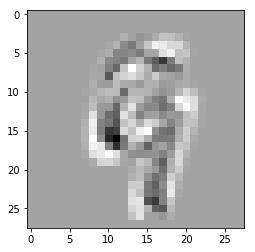

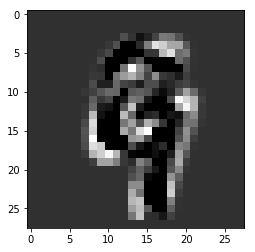

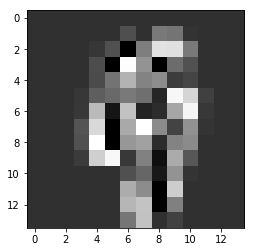

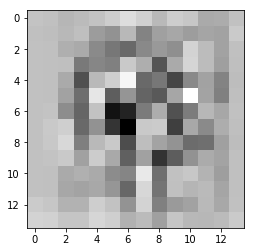

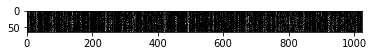

iter:  5400 train_cost:  0.0 train_acc:  1.0 test_cost:  204.3317 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


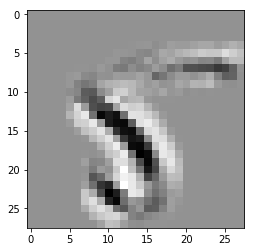

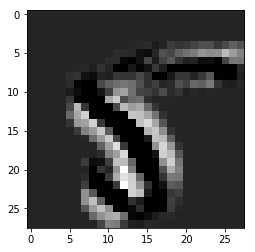

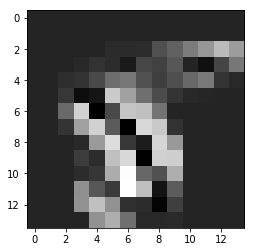

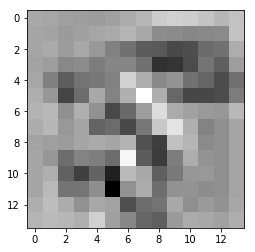

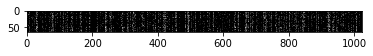

iter:  5500 train_cost:  15.902008 train_acc:  0.984375 test_cost:  46.693985 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


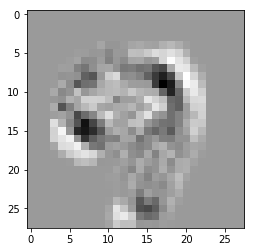

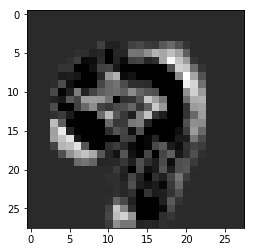

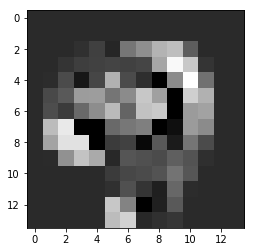

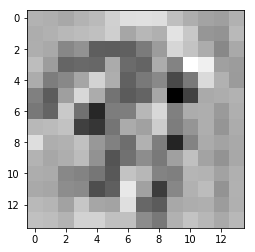

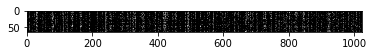

iter:  5600 train_cost:  0.0 train_acc:  1.0 test_cost:  163.79675 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


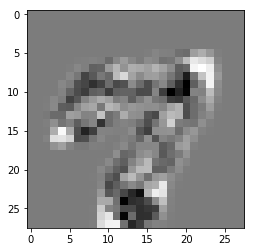

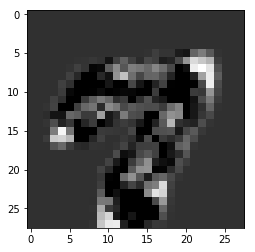

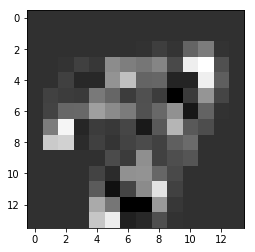

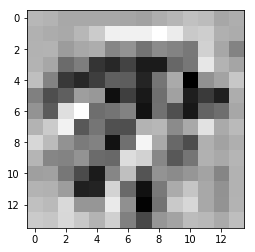

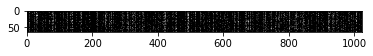

iter:  5700 train_cost:  0.0 train_acc:  1.0 test_cost:  74.88364 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


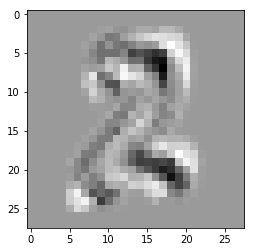

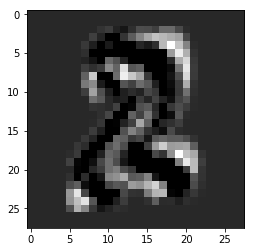

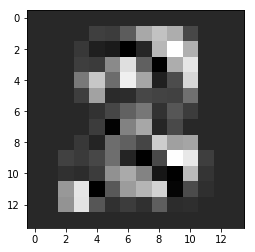

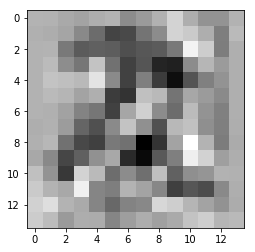

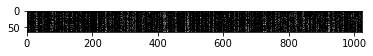

iter:  5800 train_cost:  0.0 train_acc:  1.0 test_cost:  37.409637 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


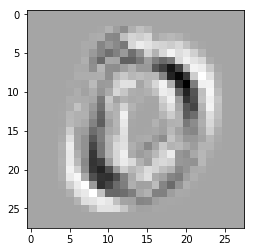

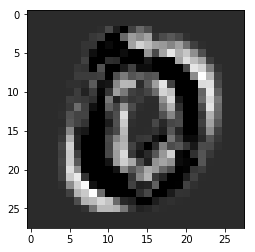

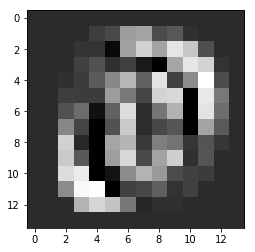

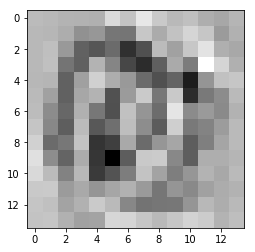

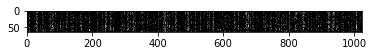

iter:  5900 train_cost:  0.0 train_acc:  1.0 test_cost:  269.47293 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


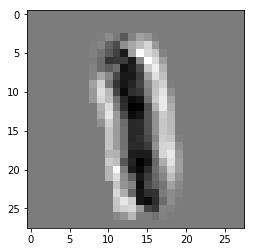

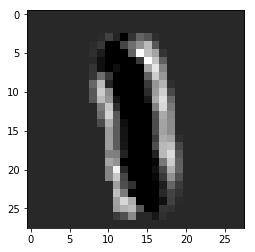

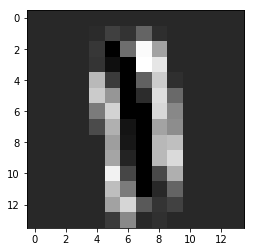

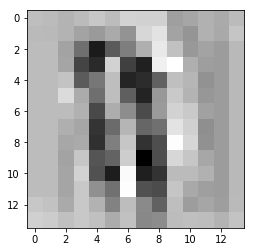

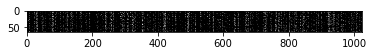

iter:  6000 train_cost:  0.0 train_acc:  1.0 test_cost:  37.742996 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


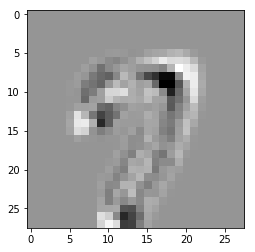

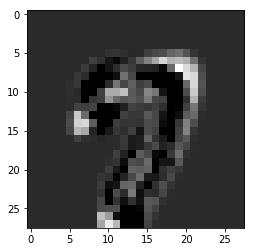

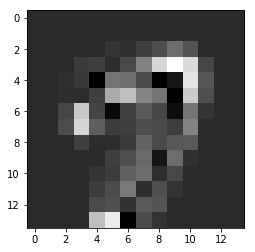

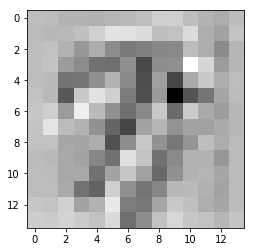

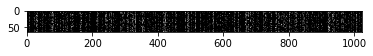

iter:  6100 train_cost:  0.0 train_acc:  1.0 test_cost:  43.738037 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


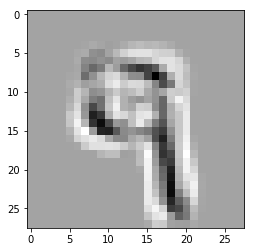

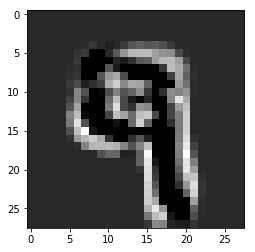

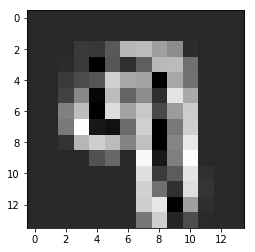

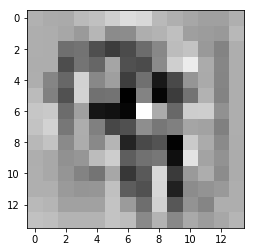

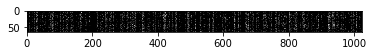

iter:  6200 train_cost:  0.0 train_acc:  1.0 test_cost:  192.74657 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


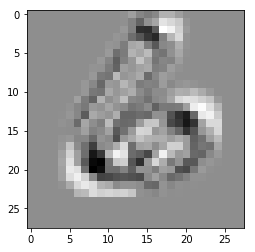

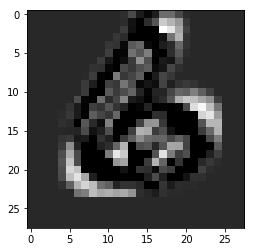

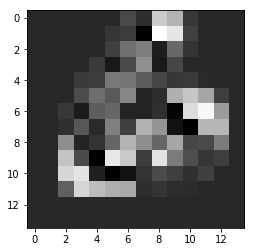

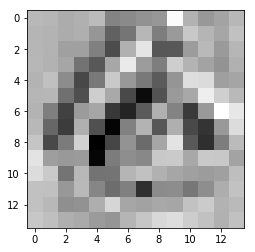

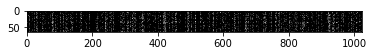

iter:  6300 train_cost:  0.0 train_acc:  1.0 test_cost:  100.982666 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


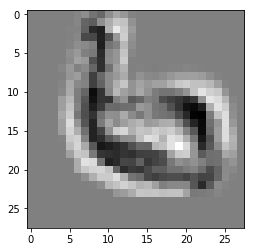

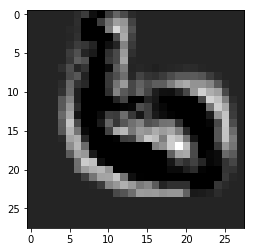

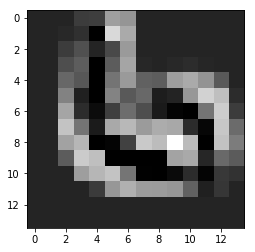

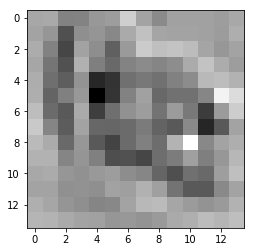

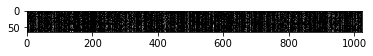

iter:  6400 train_cost:  0.0 train_acc:  1.0 test_cost:  27.95404 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


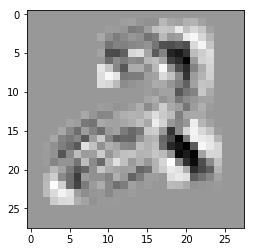

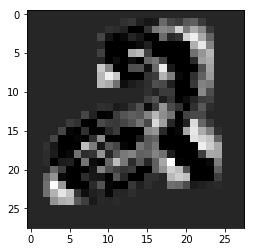

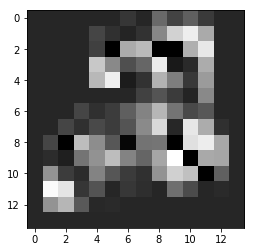

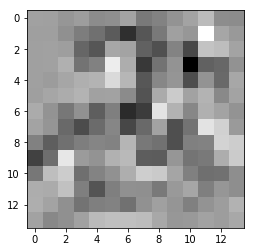

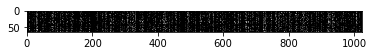

iter:  6500 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


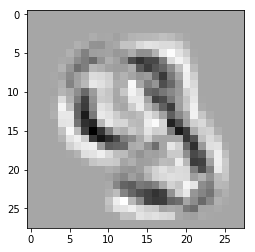

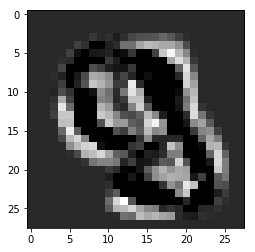

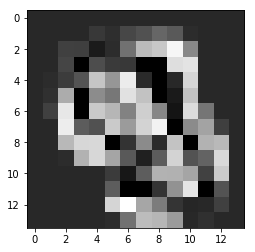

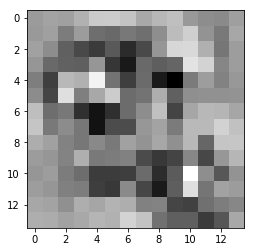

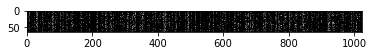

iter:  6600 train_cost:  0.0 train_acc:  1.0 test_cost:  422.48264 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


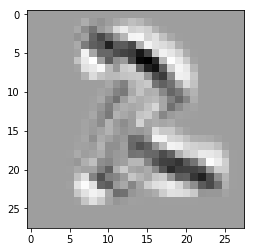

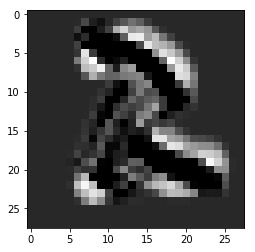

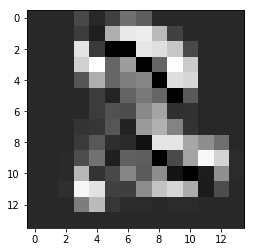

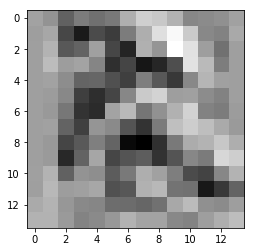

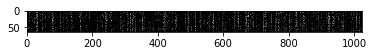

iter:  6700 train_cost:  0.0 train_acc:  1.0 test_cost:  64.81082 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


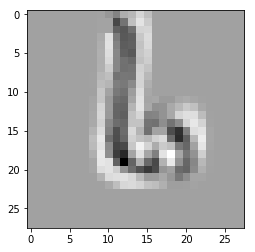

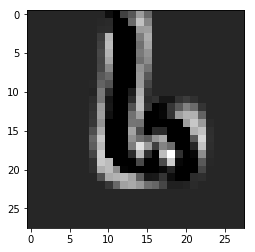

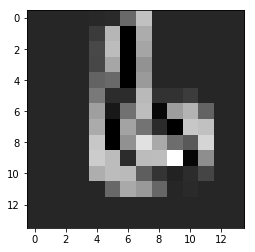

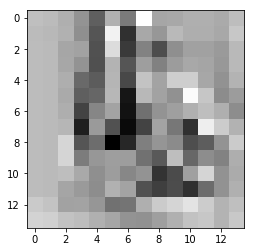

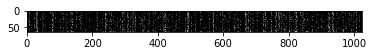

iter:  6800 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


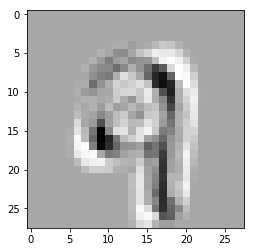

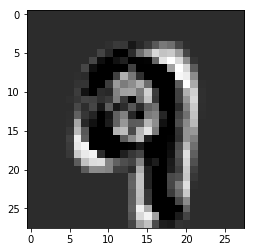

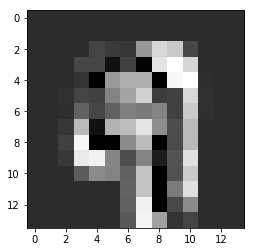

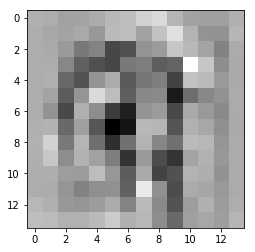

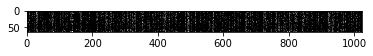

iter:  6900 train_cost:  0.0 train_acc:  1.0 test_cost:  83.2717 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


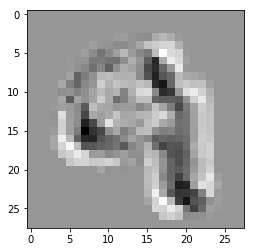

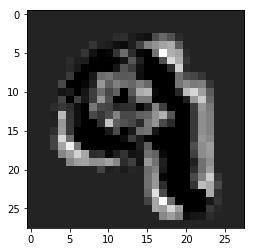

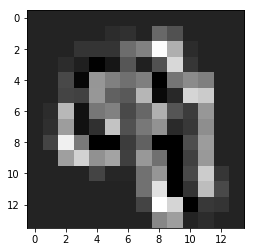

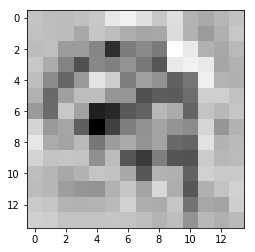

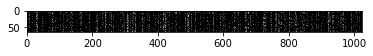

iter:  7000 train_cost:  0.0 train_acc:  1.0 test_cost:  222.92102 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


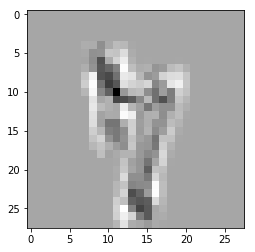

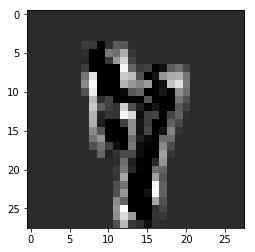

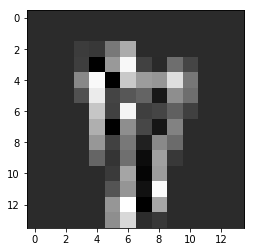

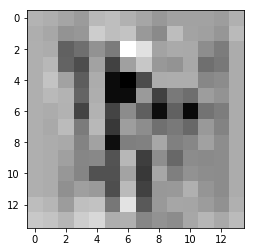

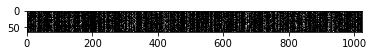

iter:  7100 train_cost:  0.0 train_acc:  1.0 test_cost:  58.99099 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


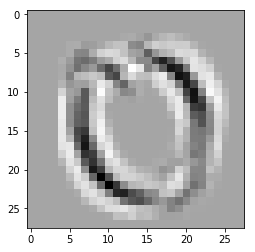

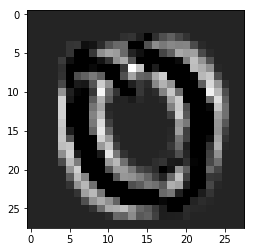

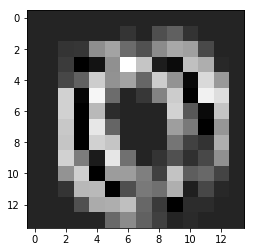

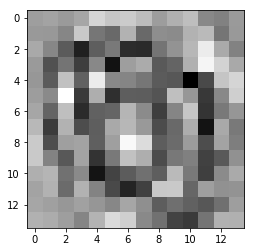

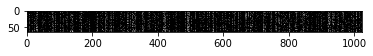

iter:  7200 train_cost:  0.0 train_acc:  1.0 test_cost:  182.7287 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


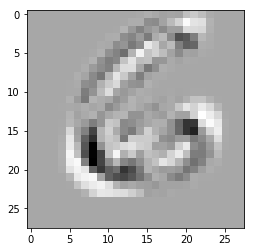

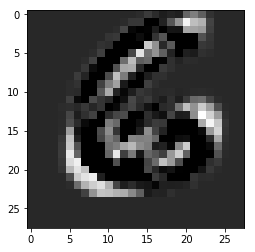

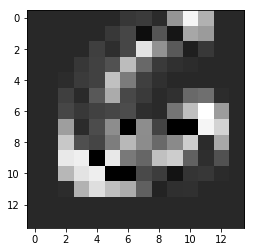

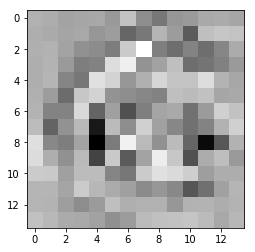

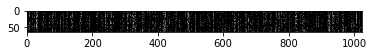

iter:  7300 train_cost:  0.0 train_acc:  1.0 test_cost:  173.52202 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


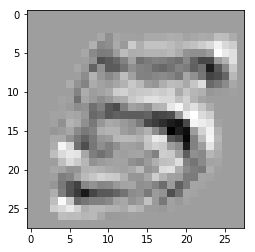

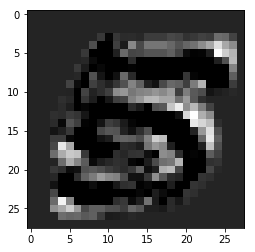

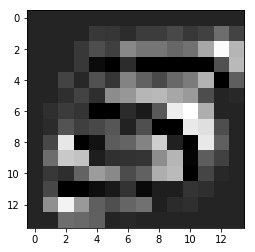

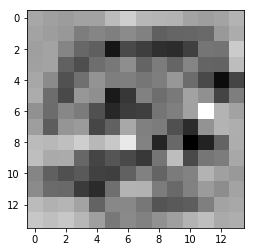

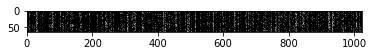

iter:  7400 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


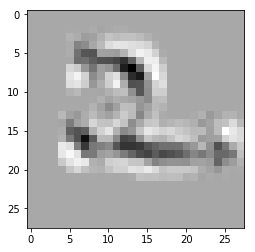

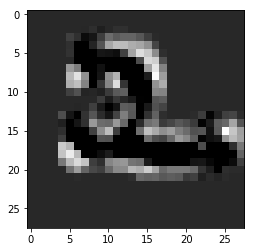

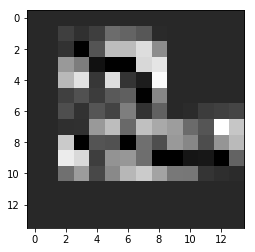

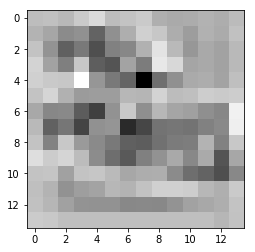

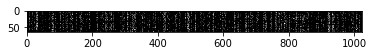

iter:  7500 train_cost:  0.0 train_acc:  1.0 test_cost:  77.317825 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


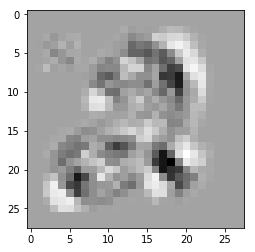

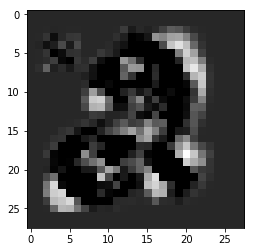

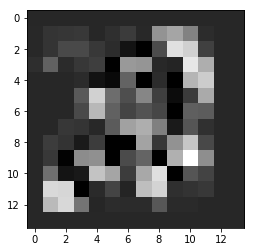

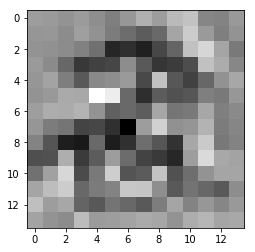

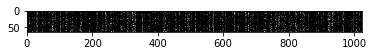

iter:  7600 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


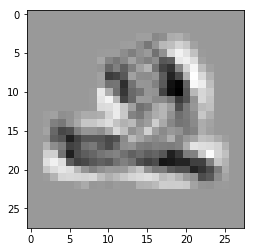

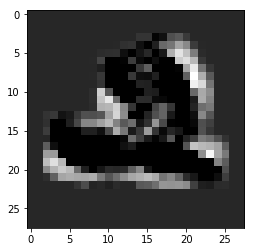

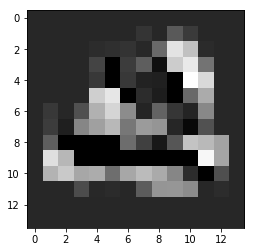

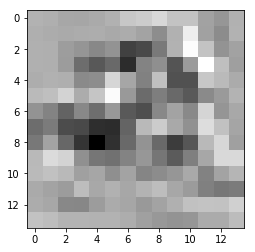

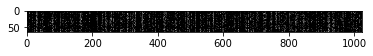

iter:  7700 train_cost:  0.0 train_acc:  1.0 test_cost:  66.54202 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


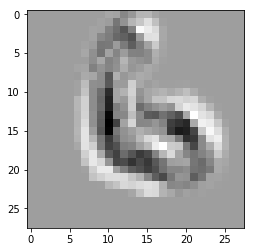

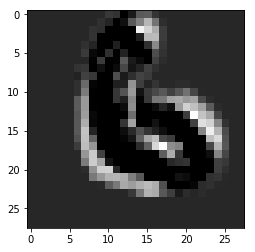

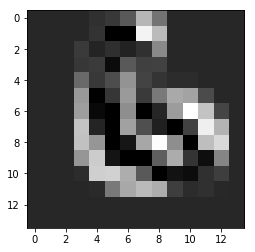

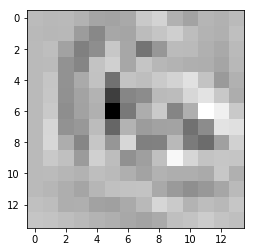

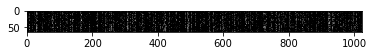

iter:  7800 train_cost:  0.0 train_acc:  1.0 test_cost:  4.0345764 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


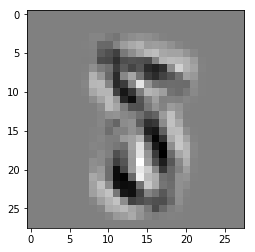

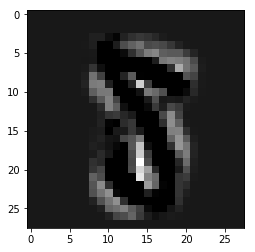

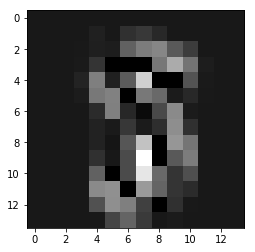

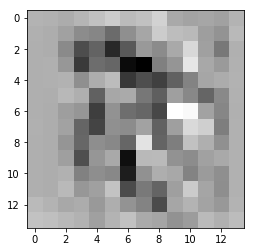

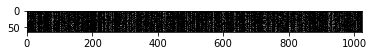

iter:  7900 train_cost:  40.62137 train_acc:  0.96875 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


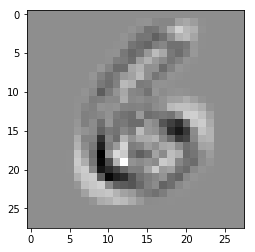

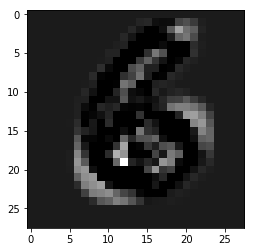

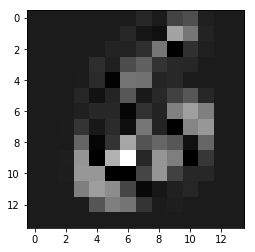

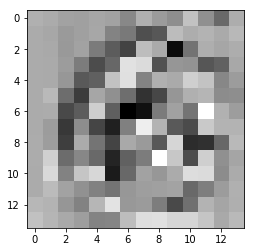

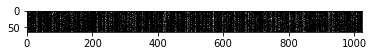

iter:  8000 train_cost:  59.432648 train_acc:  0.984375 test_cost:  571.23914 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


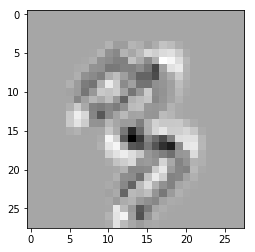

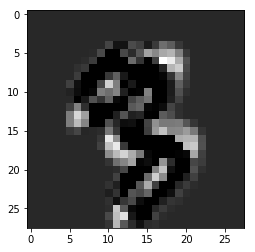

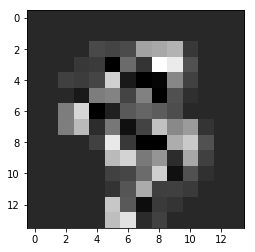

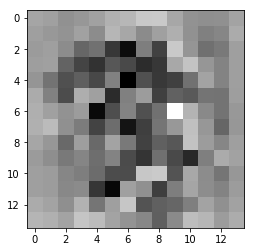

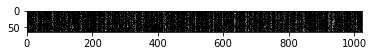

iter:  8100 train_cost:  1.6347656 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


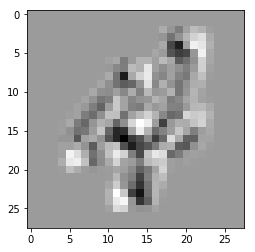

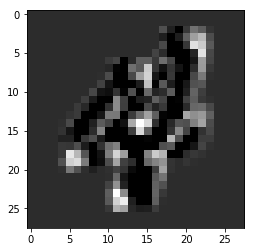

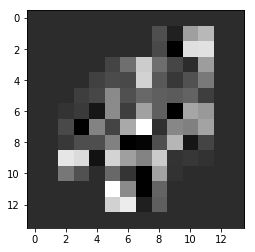

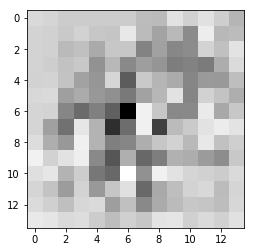

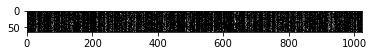

iter:  8200 train_cost:  0.0 train_acc:  1.0 test_cost:  179.37466 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


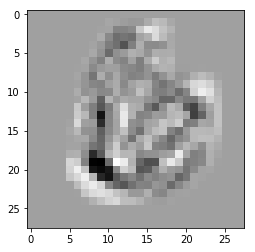

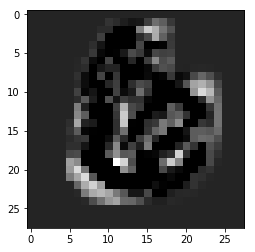

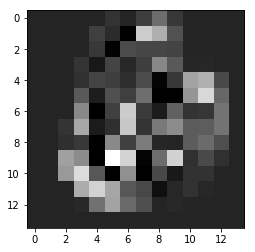

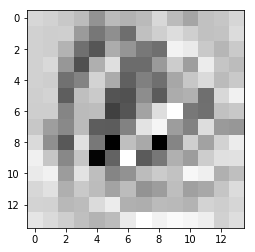

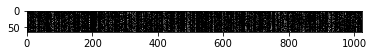

iter:  8300 train_cost:  0.0 train_acc:  1.0 test_cost:  73.92563 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


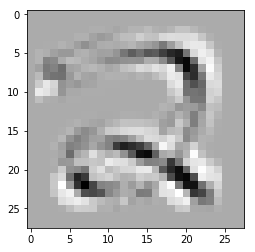

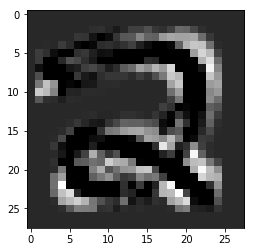

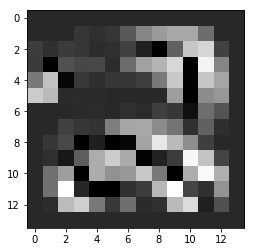

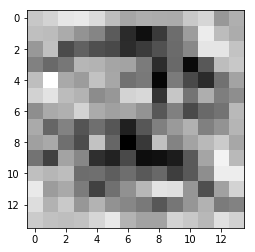

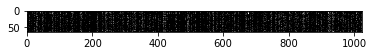

iter:  8400 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


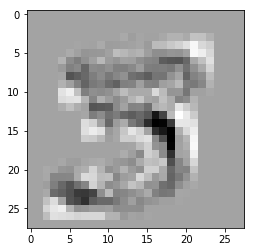

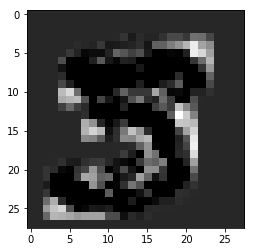

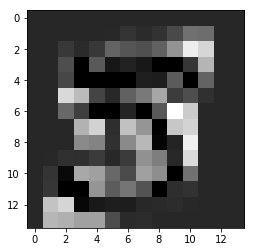

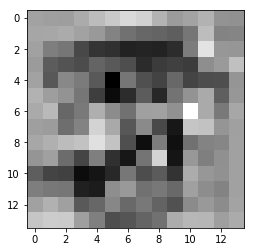

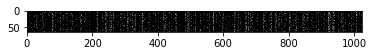

iter:  8500 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


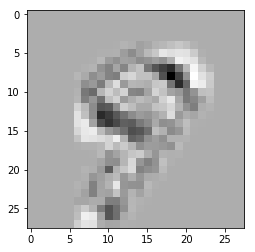

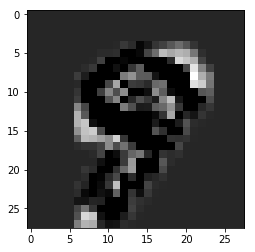

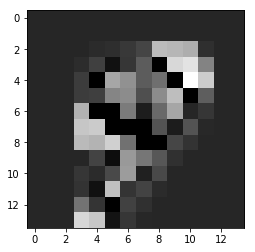

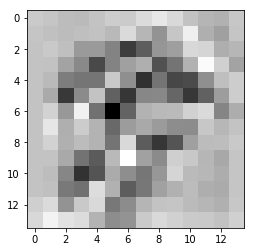

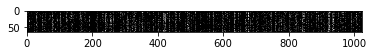

iter:  8600 train_cost:  0.0 train_acc:  1.0 test_cost:  210.09064 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


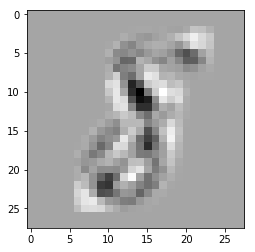

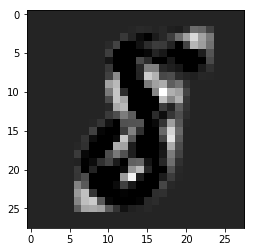

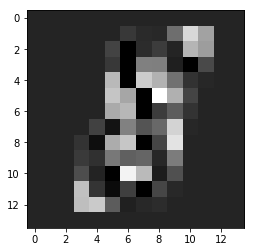

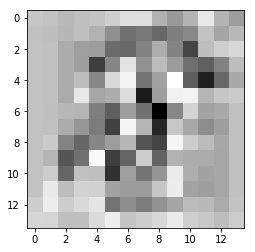

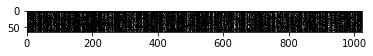

iter:  8700 train_cost:  12.705017 train_acc:  0.984375 test_cost:  188.42711 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


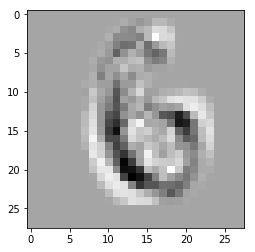

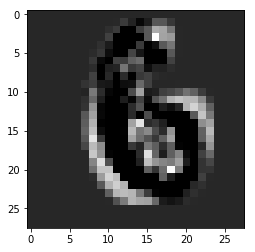

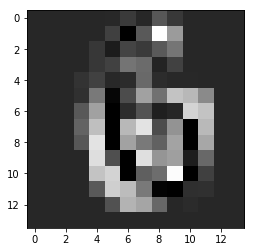

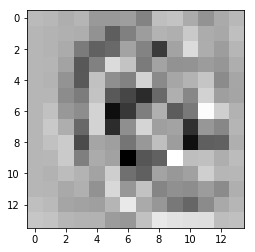

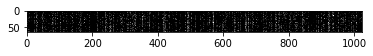

iter:  8800 train_cost:  1.3038511e-08 train_acc:  1.0 test_cost:  343.97418 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


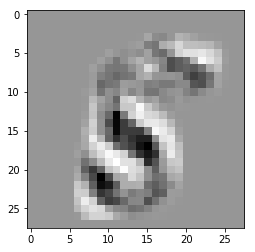

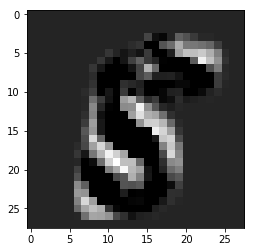

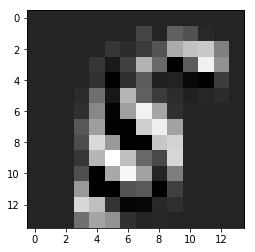

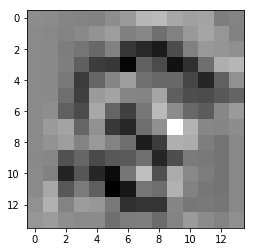

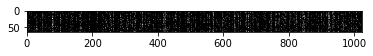

iter:  8900 train_cost:  0.0 train_acc:  1.0 test_cost:  49.285294 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


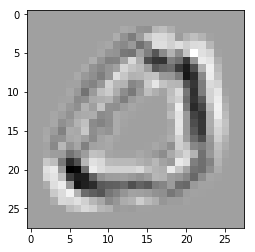

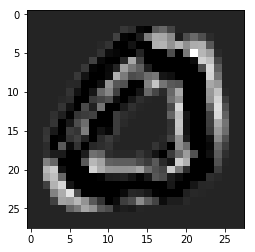

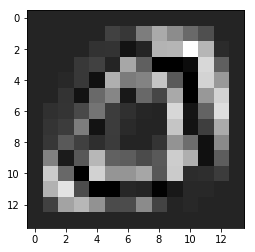

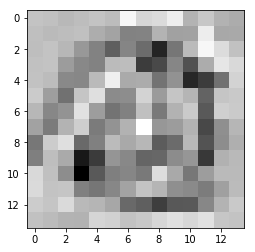

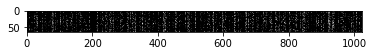

iter:  9000 train_cost:  0.0 train_acc:  1.0 test_cost:  100.16452 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


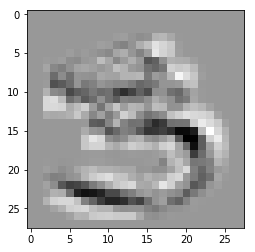

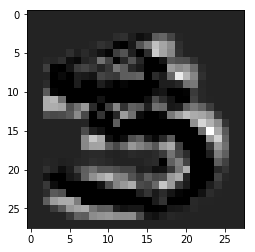

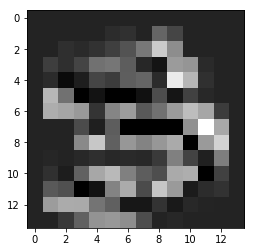

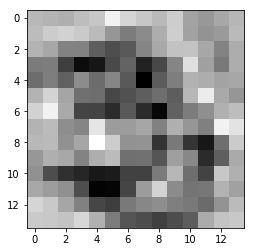

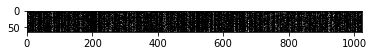

iter:  9100 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


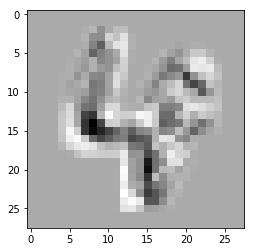

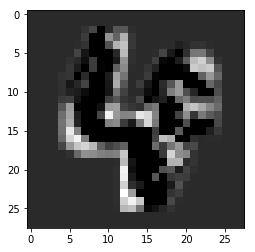

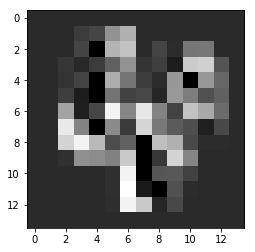

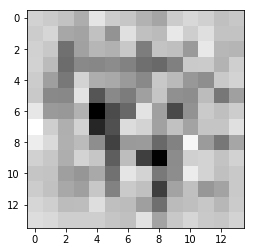

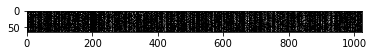

iter:  9200 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


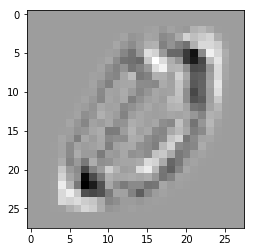

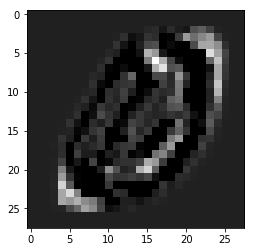

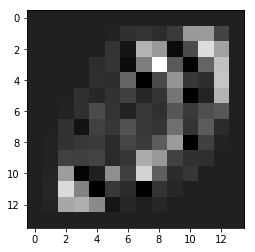

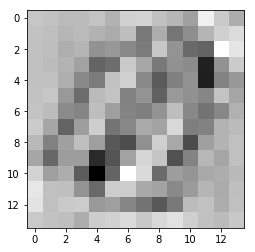

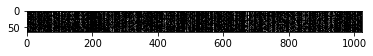

iter:  9300 train_cost:  0.0 train_acc:  1.0 test_cost:  81.02222 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


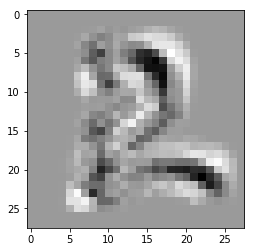

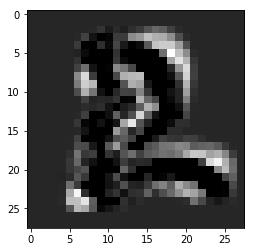

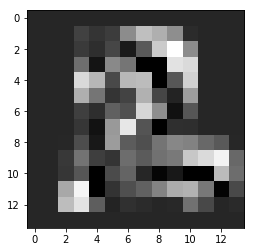

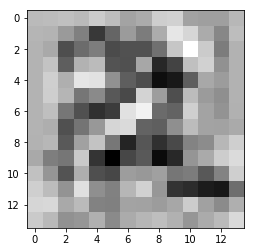

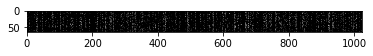

iter:  9400 train_cost:  0.0 train_acc:  1.0 test_cost:  57.227478 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


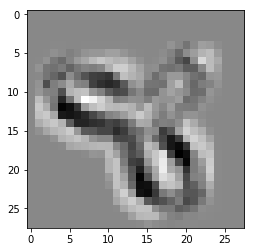

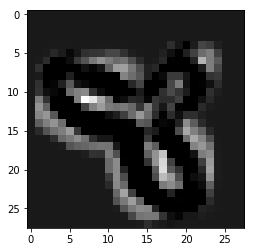

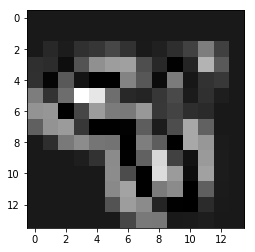

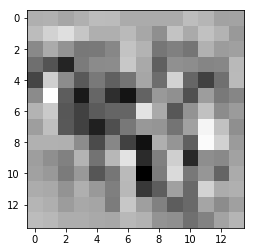

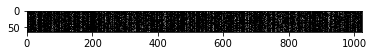

iter:  9500 train_cost:  0.0 train_acc:  1.0 test_cost:  20.263779 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


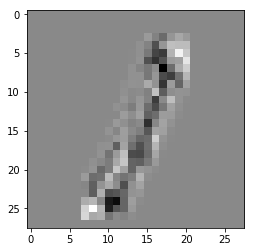

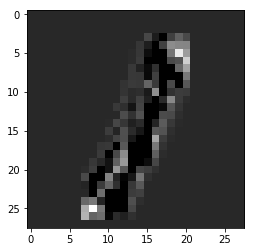

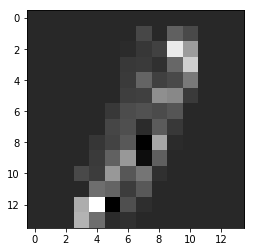

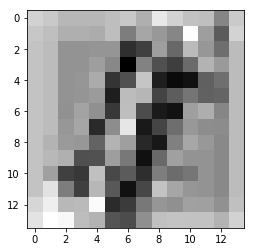

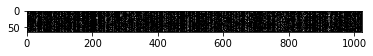

iter:  9600 train_cost:  0.0 train_acc:  1.0 test_cost:  94.18469 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


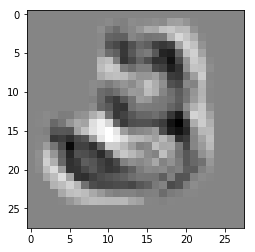

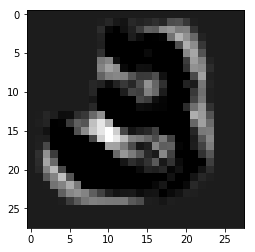

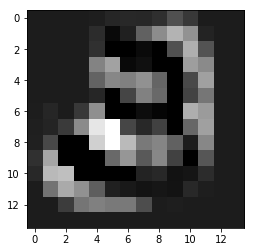

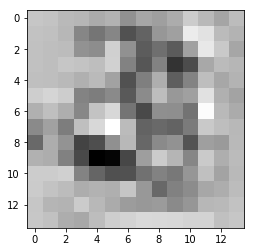

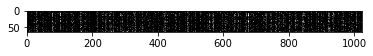

iter:  9700 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


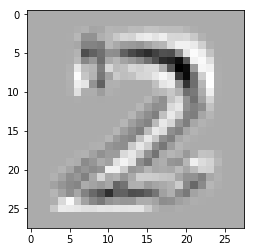

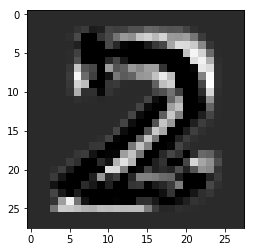

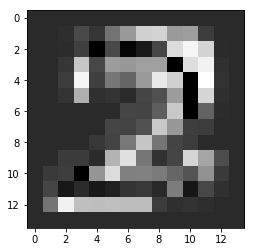

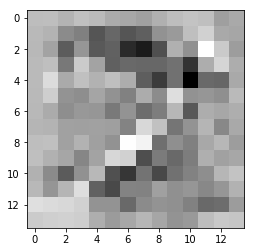

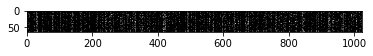

iter:  9800 train_cost:  0.0 train_acc:  1.0 test_cost:  15.500961 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


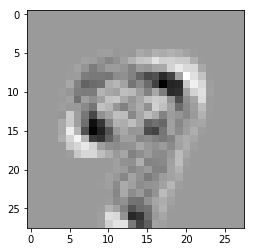

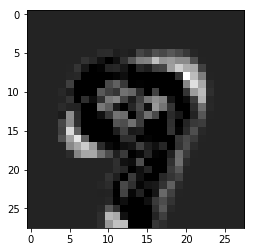

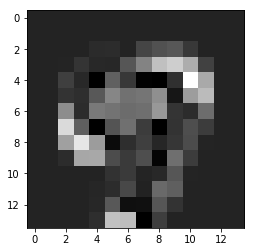

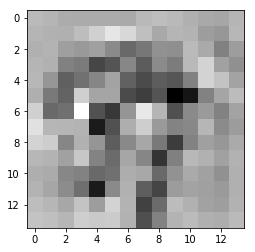

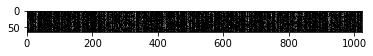

iter:  9900 train_cost:  0.0 train_acc:  1.0 test_cost:  23.180878 test_acc:  0.984375 num_of_returned_sensors: 7


In [45]:
n_classes=10
learning_rate=0.002
batch_size=64

import tensorflow as tf

import matplotlib.pyplot as plt
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x


num_inputs = 784
num_outputs= 10

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs],name = 'input')
y = tf.placeholder(tf.float32, [None, num_outputs],name =  'output')


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    
    with tf.name_scope('input-reshape'):
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

    with tf.name_scope('conv-1'):

        # Convolution Layer
        conv_pre_actv_1 = conv2d(x, weights['wc1'], biases['bc1'])
        conv_actv_1 = tf.nn.relu(conv_pre_actv_1)
        
        print('conv_actv_1 max',conv_actv_1.get_shape().as_list())

    with tf.name_scope('maxpooling-1'):
        
        # Max Pooling (down-sampling)
        conv1 = maxpool2d(conv_actv_1, k=2)
        print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    with tf.name_scope('conv-2'):

        conv_pre_actv_2 = conv2d(conv1, weights['wc2'], biases['bc2'])
        conv_actv_2 = tf.nn.relu(conv_pre_actv_2)

        
        print('con2_before max',conv_actv_2.get_shape().as_list())


    with tf.name_scope('maxpooling-2'):
        
     
        # Max Pooling (down-sampling)
        conv2 = maxpool2d(conv_actv_2, k=2)
        print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    with tf.name_scope('flatten'):
    
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    with tf.name_scope('output'):
    
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
        
    list_of_tensors = [conv_pre_actv_1,conv_actv_1, conv1,conv_pre_actv_2,conv_actv_2, conv2, fc1]
    return out, list_of_tensors


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

y_p,list_of_tensors = conv_net(x, weights, biases)

#crossentropy cost
with tf.name_scope('cross_entropy'):

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost

#tf.summary.scalar('cross_entropy', cost)


# Evaluate model
with tf.name_scope('operations'):

    correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#
merged = tf.summary.scalar('accuracy', accuracy)



# optimisation 
with tf.name_scope('optimisation'):

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
#merged = tf.summary.merge_all()

init = tf.global_variables_initializer()



# Launch the graph
with tf.Session() as sess:
    #graph_writer = tf.summary.FileWriter('./log/train', sess.graph)
    #graph_writer.add_summary()
    train_writer = tf.summary.FileWriter('./log/train', sess.graph)
    test_writer = tf.summary.FileWriter('./log/test')
    sess.run(init)
    print('started')
    
    for i in range(10000):
        
        
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        

        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})


        summary,train_cost , train_acc = sess.run([merged,cost,accuracy], feed_dict={x: batch_x,y: batch_y})
        train_writer.add_summary(summary, i)

        #print('started')

        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        summary,test_cost, test_acc  = sess.run([merged,cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        test_writer.add_summary(summary, i)
        
        if i % 100 ==0:
            
           
            val_list_of_tensors = sess.run(list_of_tensors, feed_dict={x: test_batch_x})
            num_of_returned_sensors = len(val_list_of_tensors)
            
            print(val_list_of_tensors[-1].shape)
            
            imshow(val_list_of_tensors[0][0,:,:,0], cmap='gray')# conv1 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[1][0,:,:,0],  cmap='gray')# conv1 after-activation first input image first filter
            plt.show()

            
            imshow(val_list_of_tensors[2][0,:,:,0], cmap='gray')# conv2 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[3][0,:,:,0], cmap='gray')# conv2 after-activation first input image first filter
            plt.show()
            
            imshow(val_list_of_tensors[-1], cmap='gray')# conv2 pre-activation first input image first filter
            plt.show()


            print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc, 'num_of_returned_sensors:', num_of_returned_sensors )




In [38]:

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-06-06 08:21:52--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.2.175.150, 54.152.127.232, 52.3.53.115, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.2.175.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.88M  8.68MB/s    in 1.8s    

2019-06-06 08:21:54 (8.68 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
) # can also use tensorboard --log.... on local machine if tensorflow is installed

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [41]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://d885a5bd.ngrok.io
